# Research Question: Can We Predict What Factors Affect Laptop Prices?

### In this notebook I will analyze Laptop Prices Dataset using Simple Statistical Techniques.

#### Problem Statement for Laptop Price Prediction:

**The problem statement is that if any user wants to buy a laptop then our application should be compatible to provide a tentative price of laptop according to the user configurations. Although it looks like a simple project or just developing a model, the dataset we have is noisy and needs lots of feature engineering, and preprocessing that will drive your interest in developing this project.**

![img](https://imagevars.gulfnews.com/2022/10/06/laptop_183aadaa25a_medium.jpg)

In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.6/483.6 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ | done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 3.5 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ | / done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 81.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 71.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 78.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.2/185.2

In [2]:
import warnings
warnings.filterwarnings("ignore")

#Math and Vectors
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import re
import missingno as msno

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/laptop-price-prediction/laptops_train.csv
/kaggle/input/laptop-price-prediction/laptops_test.csv


In [4]:
train = pd.read_csv("/kaggle/input/laptop-price-prediction/laptops_train.csv")
test = pd.read_csv("/kaggle/input/laptop-price-prediction/laptops_test.csv")

### Basic Data Understanding

**The first step in data understanding is Data Assessment. This should be undertaken before the kick-off of a project as it is an important step to validate its feasibility. This task evaluates what data is available and how it aligns to the business problem. It should answer the following questions:**

**What data is available?**

**How much data is available?**

**Do you have access to the ground truth, the values you’re trying to predict?**

**What format will the data be in?**

**Where does it reside?**

**How can the data be accessed?**

**Which fields are most important?**

**How do the multiple data sources get joined?**

**What important metrics are reported using this data?**

**If applicable, how does the data map to the current method of completing the task today?**

In [5]:
#Exploring the first five records of our train dataset.
train.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


In [6]:
#Exploring the first five records of our test dataset.
test.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,"15.6""",1366x768,Intel Core i7 7500U 2.7GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows,10,2.04kg,5148468.0
1,Asus,Rog GL753VE-DS74,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99kg,15552108.0
2,Dell,Inspiron 7579,2 in 1 Convertible,"15.6""",IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12GB,512GB SSD,Intel HD Graphics 620,Windows,10,2.19kg,11550708.0
3,Toshiba,Portege Z30-C-1CV,Notebook,"13.3""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows,7,1.2kg,10625940.0
4,Lenovo,IdeaPad 320-15ABR,Notebook,"15.6""",Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6GB,256GB SSD,AMD Radeon 530,Windows,10,2.2kg,4881708.0


#### Initial observations:

**We observe that there are different types of variables (columns). Variables which contain records that encompases numbers, letters, or both numerals and letters (alphanumerics). There are columns which contain special characters (i.e., /,.,?,×,"). We will be treating such records (observations) while dealing with Data Preprocessing in order to reach clear insights of our dataset.**

## Dataset Statistics

**1. What is the shape and/or dimension of our dataset?**

**2. What are the different data types that we have in our dataset?**

**3. How many missing records do we have and what is their percentage?**

**4. How many duplicate records do we have and what is their percentage?**

**5. What is the summary statistics of our dataset?**

In [7]:
#What is the shape of our data?
print("The number of dimensions (rows, columns) of our dataset is: {}".format(train.shape))

The number of dimensions (rows, columns) of our dataset is: (977, 13)


In [8]:
#What are the data types that we have in our dataset?
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              977 non-null    object 
 1   Model Name                977 non-null    object 
 2   Category                  977 non-null    object 
 3   Screen Size               977 non-null    object 
 4   Screen                    977 non-null    object 
 5   CPU                       977 non-null    object 
 6   RAM                       977 non-null    object 
 7    Storage                  977 non-null    object 
 8   GPU                       977 non-null    object 
 9   Operating System          977 non-null    object 
 10  Operating System Version  841 non-null    object 
 11  Weight                    977 non-null    object 
 12  Price                     977 non-null    float64
dtypes: float64(1), object(12)
memory usage: 99.4+ KB


In [9]:
#How many missing values do we have and what is their percentage?
print("The number of missing values: \n"+ str(train.isnull().sum()) +"\n\n" + "The Percentage of Missing Values: \n" + str(train.isnull().sum() / len(train) * 100))

The number of missing values: 
Manufacturer                  0
Model Name                    0
Category                      0
Screen Size                   0
Screen                        0
CPU                           0
RAM                           0
 Storage                      0
GPU                           0
Operating System              0
Operating System Version    136
Weight                        0
Price                         0
dtype: int64

The Percentage of Missing Values: 
Manufacturer                 0.000000
Model Name                   0.000000
Category                     0.000000
Screen Size                  0.000000
Screen                       0.000000
CPU                          0.000000
RAM                          0.000000
 Storage                     0.000000
GPU                          0.000000
Operating System             0.000000
Operating System Version    13.920164
Weight                       0.000000
Price                        0.000000
dtype: flo

<Axes: >

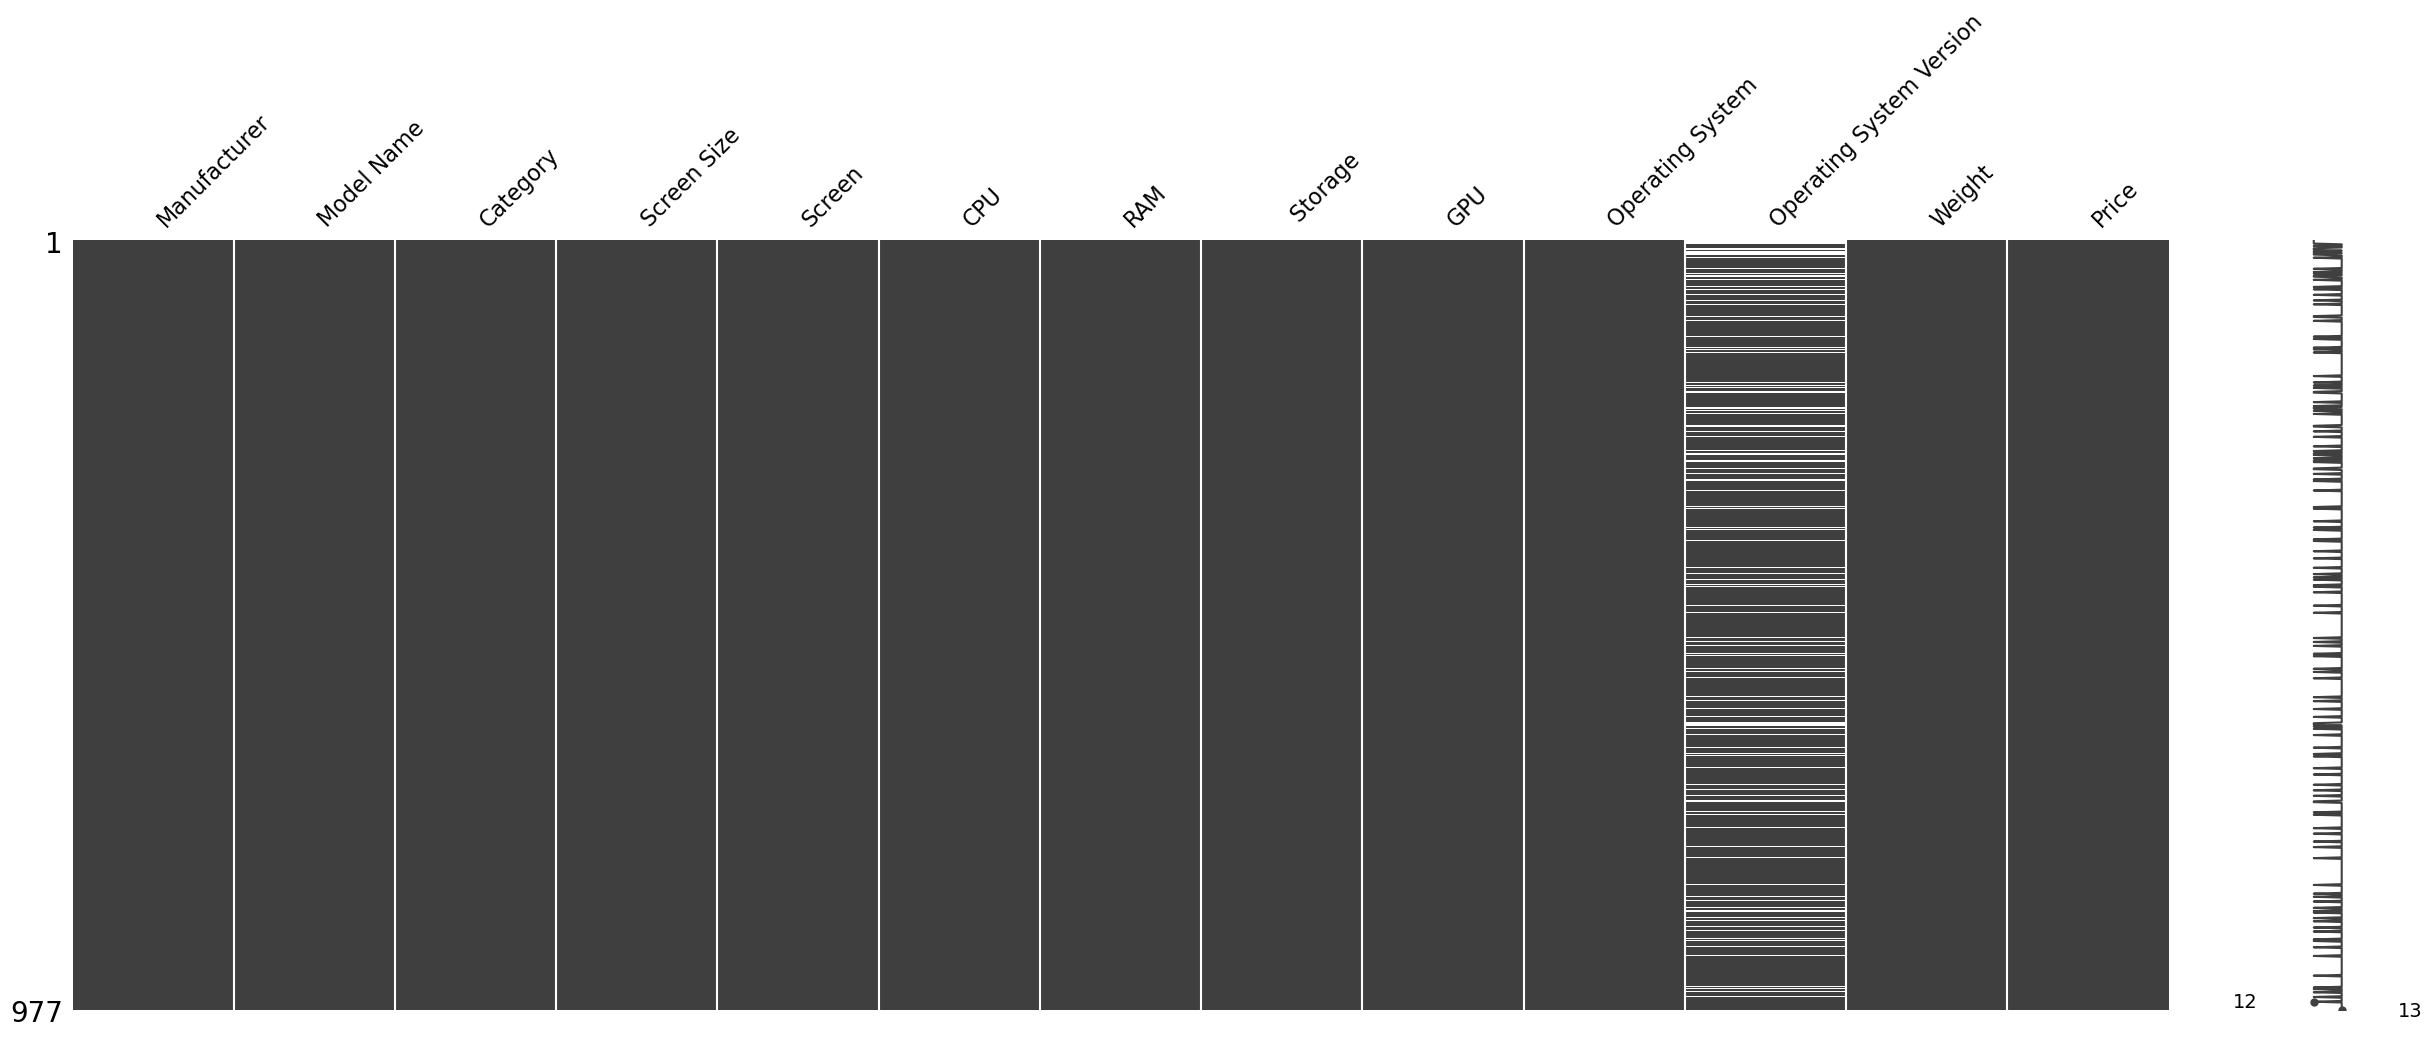

In [10]:
# Viewing null values
msno.matrix(train, figsize = (30,10))

In [11]:
#How many duplicate records do we have and what is their percentage?
print("The number of duplicate values is: {}".format(train.duplicated().sum()))

The number of duplicate values is: 0


In [12]:
## Summary Statistics of our Dataset
train.describe()

,Price
count,9.770000e+02
mean,1.001899e+07
std,6.306430e+06
min,1.706375e+06
25%,5.326308e+06
50%,8.527428e+06
75%,1.311570e+07
max,5.423231e+07


### Conclusions:

**1. The number of variables is 13. Out of them there are 12 categorical (object) variables, and 1 numerical (float) variables.**

**2. The number of observations is 977.**

**3. The number of missing cells is 136 with a percentage of 1.1% of our total observations.**

**4. We don't have any duplicate rows.**

## Statistical Corollary

**Some columns in our datasets are numerical, however, they're treated as objects (categoricals), such as: Screen Size, RAM, Weight, etc., for specific reasons in our datasets (some of them contain alphanumeric or special characters. That's why we will have to decode them in a cateful way**

# Exploratory Data Analysis

**We will be treating each column separately in order to retrieve insights about it**

In [13]:
#Changing variables' letters from uppercase to lowercase letters
train = train.rename(columns = str.lower)
test = test.rename(columns = str.lower)
train.head()

,manufacturer,model name,category,screen size,screen,cpu,ram,storage,gpu,operating system,operating system version,weight,price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


#### Comparing Means
**Compare the mean price for each level in the train column.**

In [14]:
def compare_means(df,discrete_col,continuous_col):
    group = df.groupby([discrete_col],as_index=False)[continuous_col].mean().reset_index(drop=True)
    plt.figure(figsize=(10,5))
    sns.barplot(x=group[discrete_col],y=group[continuous_col],palette='Reds')
    plt.ylabel('mean ' + continuous_col)
    plt.show()

### Target Variable: Price

<Axes: xlabel='price', ylabel='Density'>

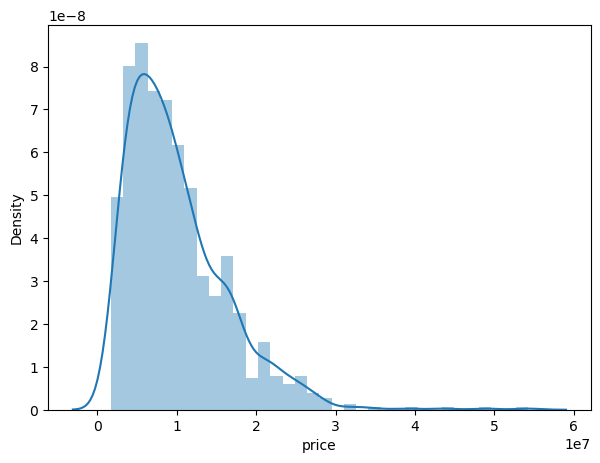

In [15]:
plt.figure(figsize = (7, 5))
sns.distplot(train["price"])

In [16]:
# Calculating the Fisher-Pearson correlation of Skewness:
print(skew(train["price"]))

1.6246441522246184


In [17]:
print(kurtosis(train["price"]))

5.00517224490561


In [18]:
train["price"].describe()

count    9.770000e+02
mean     1.001899e+07
std      6.306430e+06
min      1.706375e+06
25%      5.326308e+06
50%      8.527428e+06
75%      1.311570e+07
max      5.423231e+07
Name: price, dtype: float64

### Observations:

**At the first glance, we realize that the prices are having asymmetry distribution. The data are not being distributed equally on both sides. There aren't lots of variations. They're positively skewed without any values less than or equal to zero. Furthermore, probabilities taper off more slowely for higher values. The mean overestimates the most common values (median) because it is a positively skewed distribution. The kurtosis of our distribution is more than 3, meaning than it is a leptokurtic distribution, which indicates the existence of lots of outliers. In brief, most of our data falls to the right, or positive side, of the graph's peak. Henceforth, we might be using Natural log transformation to modify the distribution of our values.**

### General Data Preprocessing Note

In [19]:
from pycaret.anomaly import *
s = setup(train, session_id = 42)

,Description,Value
0,Session id,42
1,Original data shape,"(977, 13)"
2,Transformed data shape,"(977, 995)"
3,Numeric features,1
4,Categorical features,12
5,Rows with missing values,13.9%
6,Preprocess,True
7,Imputation type,simple
8,Numeric imputation,mean
9,Categorical imputation,mode


## Manufacturer variable

In [20]:
train.head()

,manufacturer,model name,category,screen size,screen,cpu,ram,storage,gpu,operating system,operating system version,weight,price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


In [21]:
train["manufacturer"].head()

0    Apple
1    Apple
2       HP
3    Apple
4    Apple
Name: manufacturer, dtype: object

In [22]:
train["manufacturer"].value_counts()

Dell         232
Lenovo       226
HP           179
Asus         122
Acer          83
Toshiba       39
MSI           34
Apple         17
Samsung        8
Mediacom       7
Microsoft      6
Razer          5
Xiaomi         4
Chuwi          3
Google         3
LG             3
Huawei         2
Vero           2
Fujitsu        2
Name: manufacturer, dtype: int64

In [23]:
train["manufacturer"].describe()

count      977
unique      19
top       Dell
freq       232
Name: manufacturer, dtype: object

In [24]:
train["manufacturer"].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

Let's have a look at the different manufacturers:


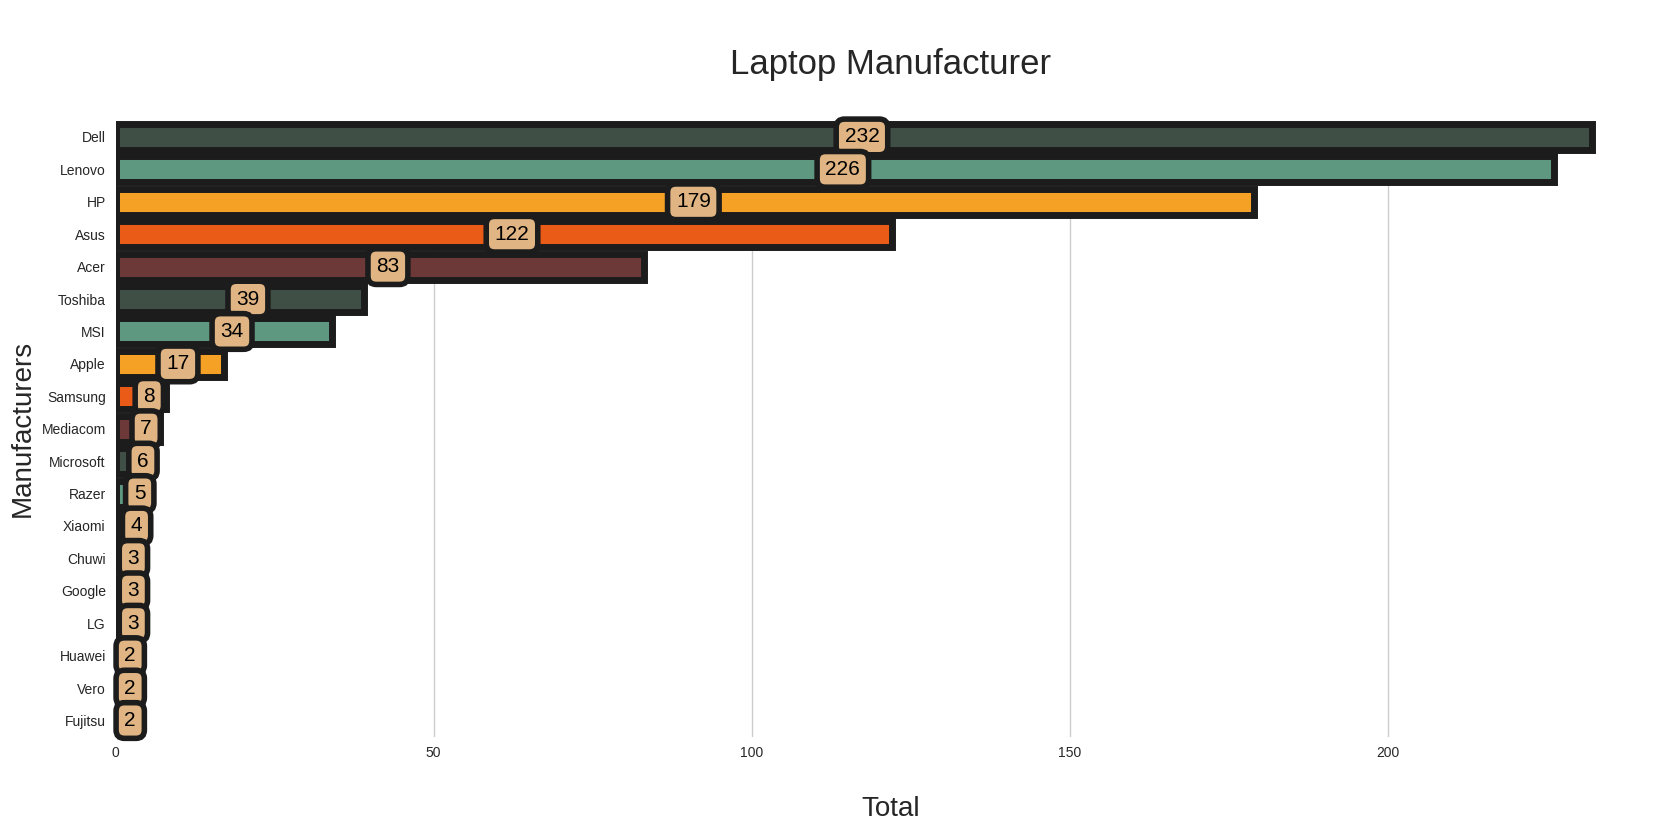

In [25]:
print("Let's have a look at the different manufacturers:")
plt.subplots(figsize=(20, 8))
p=sns.countplot(y=train["manufacturer"],order=train["manufacturer"].value_counts().index,palette=["#3f4f45","#5e9880","#f5a126","#ea5b17","#6c3938"], saturation=1, edgecolor = "#1c1c1c", linewidth = 5)
# p.axes.set_yscale("symlog")
p.axes.set_title("\nLaptop Manufacturer\n",fontsize=25)
p.axes.set_ylabel("Manufacturers",fontsize=20)
p.axes.set_xlabel("\nTotal",fontsize=20)
p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=15,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "#e0b583", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

Let's have a look on the price distribution of laptop's manufacturers :


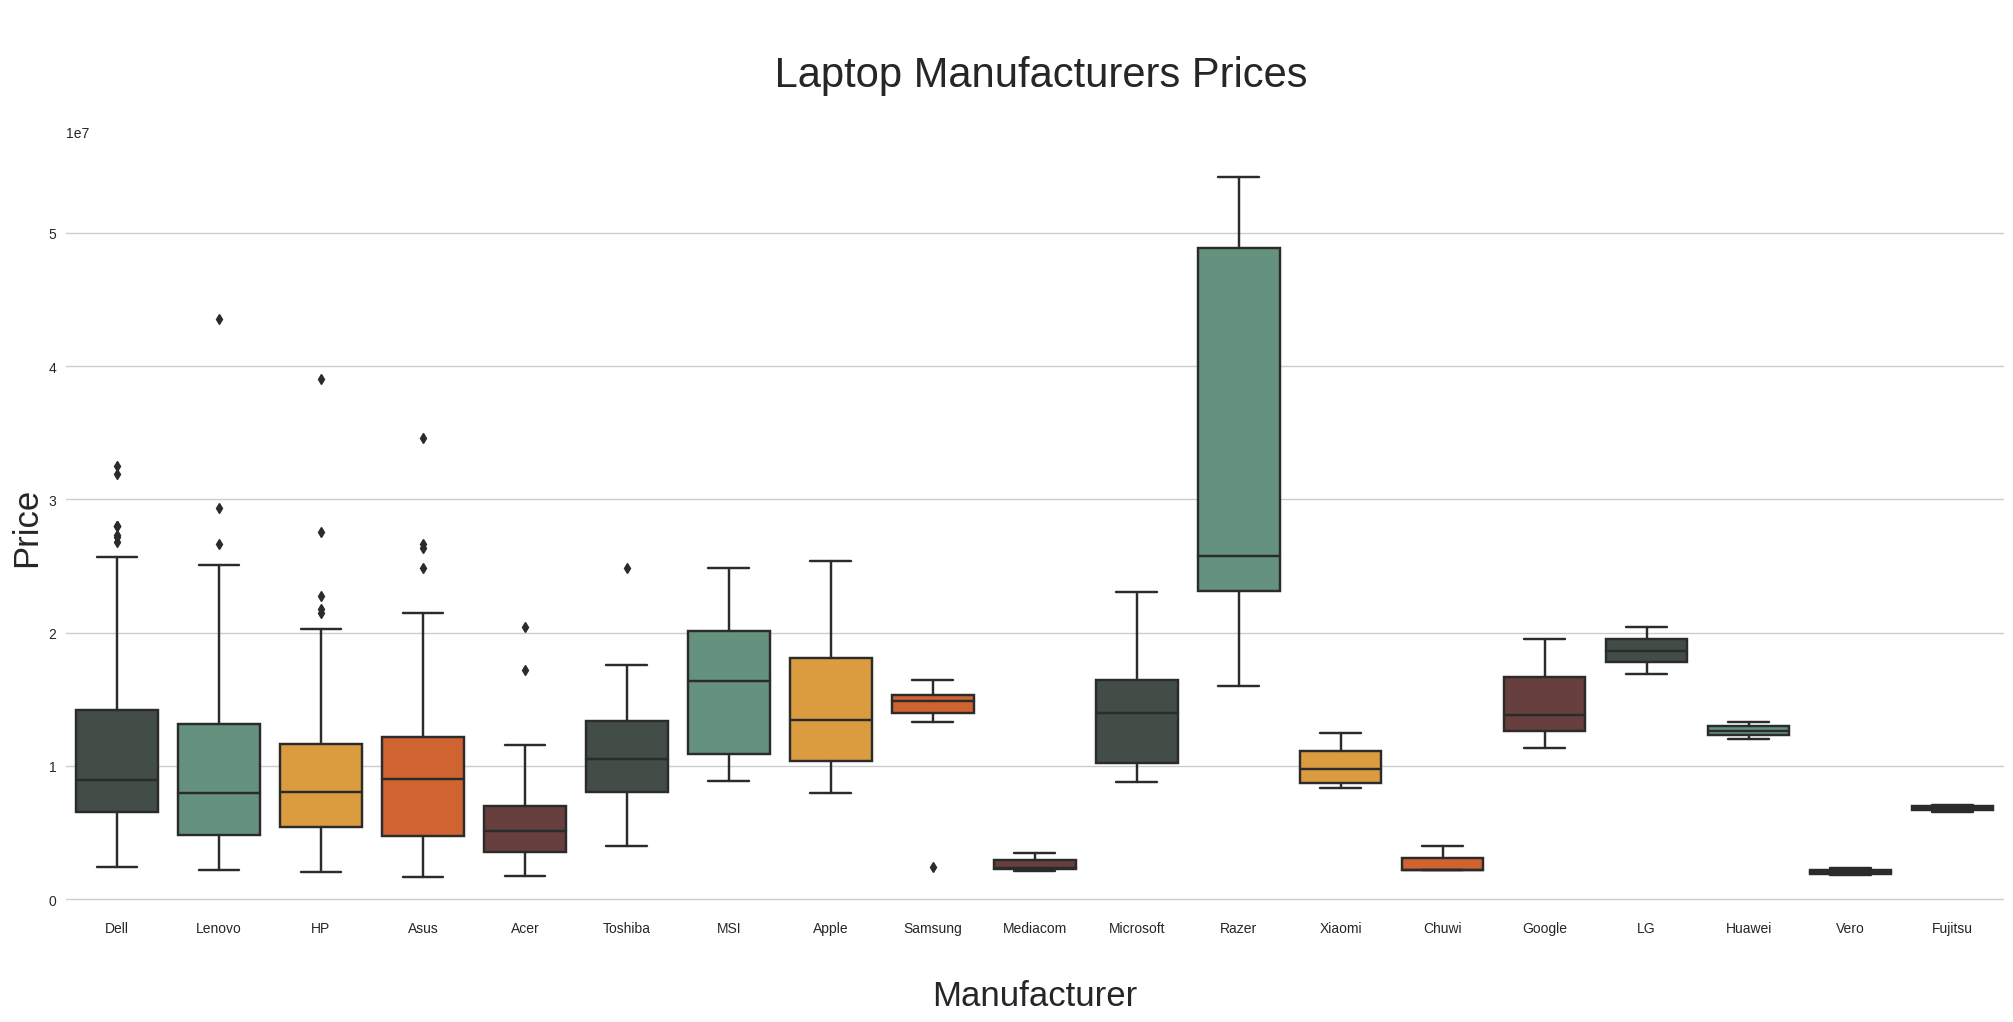

In [26]:
print("Let's have a look on the price distribution of laptop's manufacturers :")
plt.subplots(figsize=(25, 10))

p=sns.boxplot(x=train["manufacturer"],y=train["price"],order=train["manufacturer"].value_counts().index,palette=["#3f4f45","#5e9880","#f5a126","#ea5b17","#6c3938"])
p.axes.set_title("\n Laptop Manufacturers Prices\n",fontsize=30)
p.axes.set_xlabel("\nManufacturer",fontsize=25)
p.axes.set_ylabel("Price",fontsize=25)

sns.despine(left=True, bottom=True)
plt.show()

## Model Name

In [27]:
train["model name"].head()

0    MacBook Pro
1    Macbook Air
2         250 G6
3    MacBook Pro
4    MacBook Pro
Name: model name, dtype: object

In [28]:
train["model name"].value_counts()

XPS 13                22
Inspiron 3567         20
250 G6                18
Inspiron 5570         18
Vostro 3568           15
                      ..
Rog GL753VE-GC070T     1
Rog GL753VD-GC042T     1
Precision 5520         1
Precision 3510         1
ThinkPad T460          1
Name: model name, Length: 488, dtype: int64

In [29]:
train["model name"].describe()

count        977
unique       488
top       XPS 13
freq          22
Name: model name, dtype: object

Let's have a look on the ratio of model names :


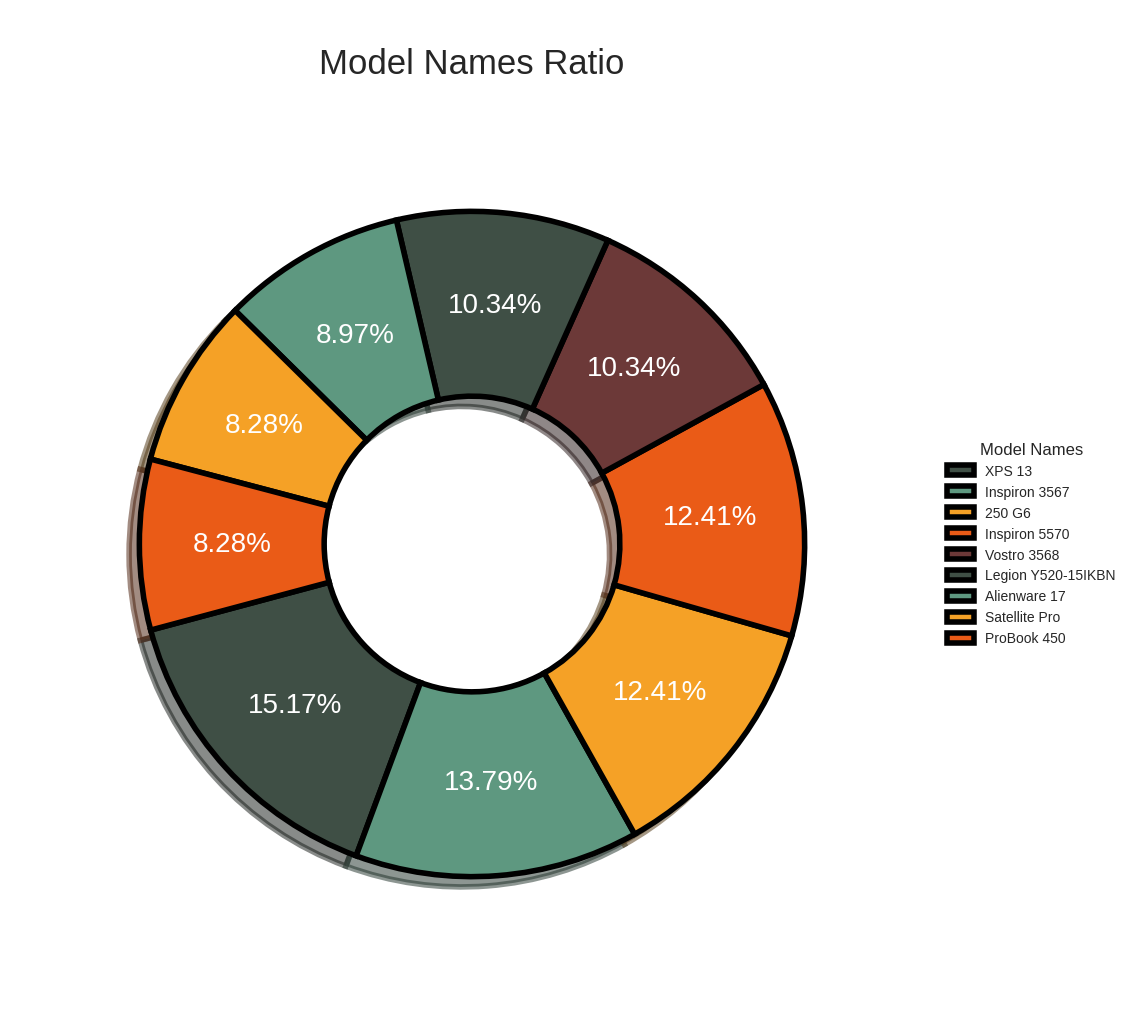

In [30]:
print(f"Let's have a look on the ratio of model names :")
plt.subplots(figsize=(12, 12))

labels = "XPS 13","Inspiron 3567","250 G6","Inspiron 5570","Vostro 3568", "Legion Y520-15IKBN", "Alienware 17", "Satellite Pro", "ProBook 450", "Latitude 5580"
size = 0.5

wedges, texts, autotexts = plt.pie([train["model name"].value_counts().values[0],
                                    train["model name"].value_counts().values[1],
                                    train["model name"].value_counts().values[2],
                                    train["model name"].value_counts().values[3],
                                    train["model name"].value_counts().values[5],
                                    train["model name"].value_counts().values[6],
                                    train["model name"].value_counts().values[7],
                                    train["model name"].value_counts().values[8],
                                    train["model name"].value_counts().values[9],
                                   ],
                                    explode = (0,0,0,0,0,0,0,0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.72,
                                    radius=.9, 
                                    colors = ["#3f4f45","#5e9880","#f5a126","#ea5b17","#6c3938"], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black", 
                                    linewidth = 4),
                                    startangle = -165)

plt.legend(wedges, labels, title="Model Names",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nModel Names Ratio",fontsize=25)
plt.show()

## Category Variable

In [31]:
train["category"]

0      Ultrabook
1      Ultrabook
2       Notebook
3      Ultrabook
4      Ultrabook
         ...    
972       Gaming
973     Notebook
974       Gaming
975     Notebook
976     Notebook
Name: category, Length: 977, dtype: object

In [32]:
train["category"].value_counts()

Notebook              549
Ultrabook             152
Gaming                150
2 in 1 Convertible     85
Workstation            24
Netbook                17
Name: category, dtype: int64

In [33]:
train["category"].describe()

count          977
unique           6
top       Notebook
freq           549
Name: category, dtype: object

In [34]:
train["category"].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

Let's have a look on the ratio of Laptop's Category :


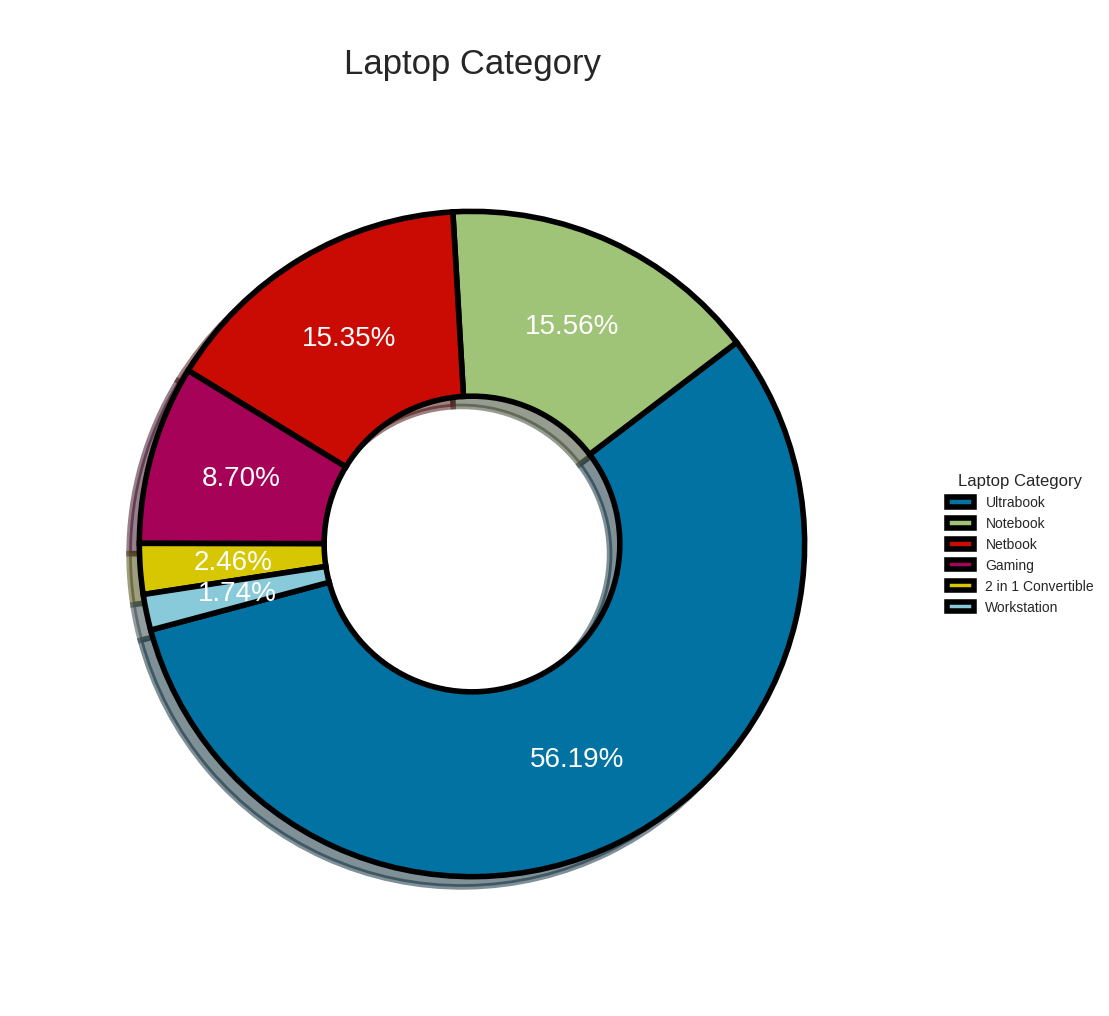

In [35]:
print(f"Let's have a look on the ratio of Laptop's Category :")
plt.subplots(figsize=(12, 12))

labels = "Ultrabook","Notebook","Netbook","Gaming","2 in 1 Convertible", "Workstation"
size = 0.5

wedges, texts, autotexts = plt.pie([train["category"].value_counts().values[0],
                                    train["category"].value_counts().values[1],
                                    train["category"].value_counts().values[2],
                                    train["category"].value_counts().values[3],
                                    train["category"].value_counts().values[4],
                                    train["category"].value_counts().values[5]],
                                    explode = (0,0,0,0,0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.72,
                                    radius=.9,
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black", 
                                    linewidth = 4),
                                    startangle = -165)

plt.legend(wedges, labels, title="Laptop Category",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nLaptop Category",fontsize=25)
plt.show()

Let's have a look at the different laptop categories:


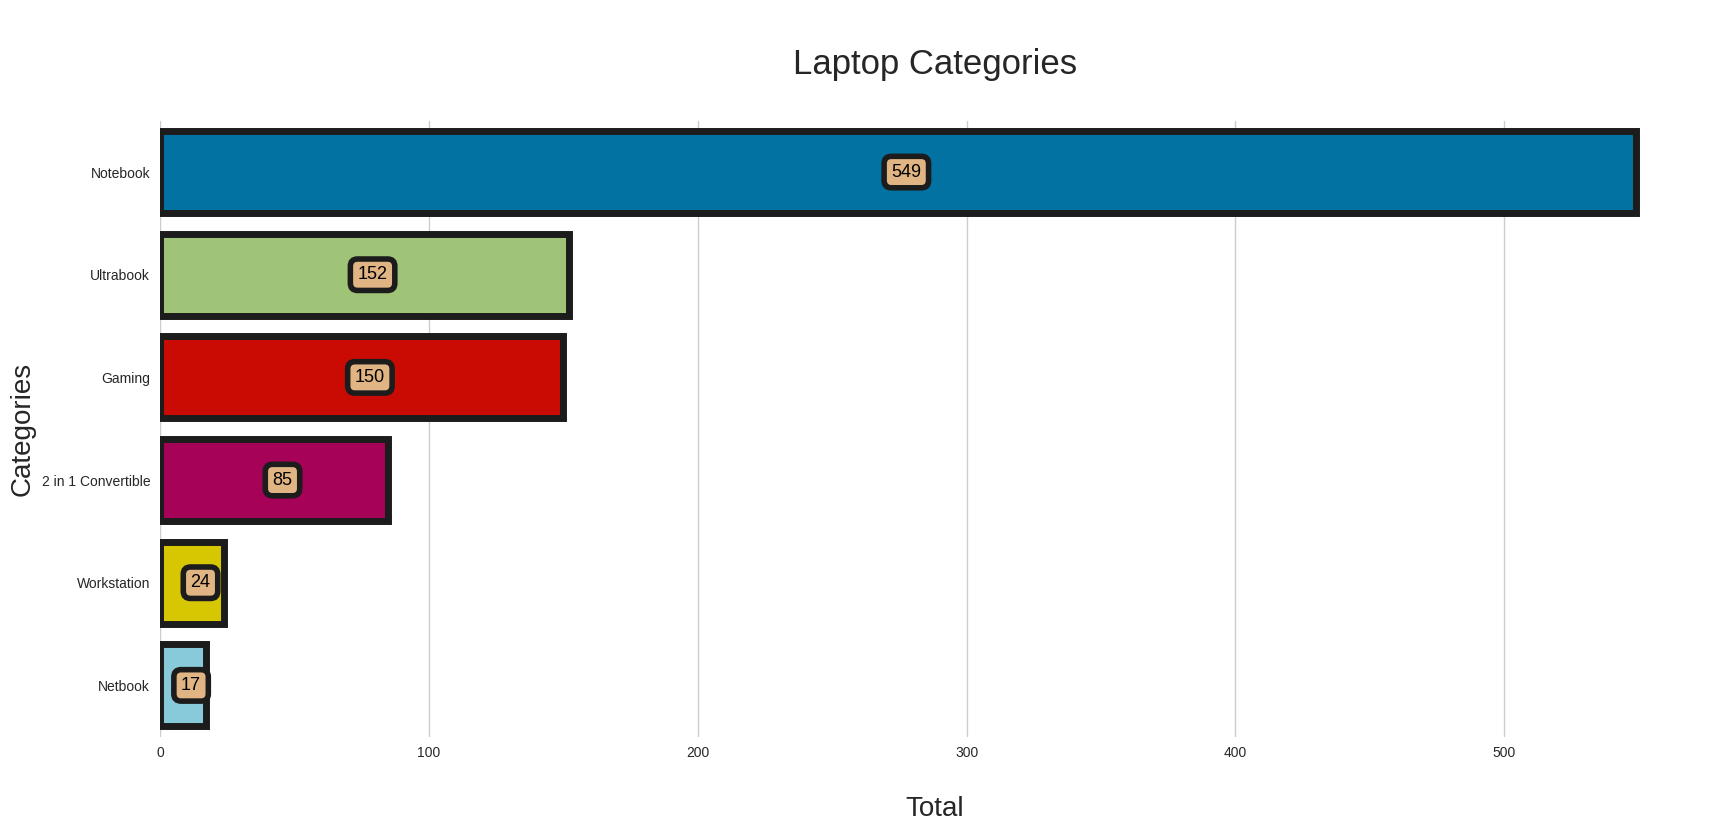

In [36]:
print("Let's have a look at the different laptop categories:")
plt.subplots(figsize=(20, 8))
p=sns.countplot(y=train["category"],order=train["category"].value_counts().index, saturation=1, edgecolor = "#1c1c1c", linewidth = 5)
# p.axes.set_yscale("symlog")
p.axes.set_title("\nLaptop Categories\n",fontsize=25)
p.axes.set_ylabel("Categories",fontsize=20)
p.axes.set_xlabel("\nTotal",fontsize=20)
p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=13,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "#e0b583", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

Let's have a look on the price distribution of laptop's categories :


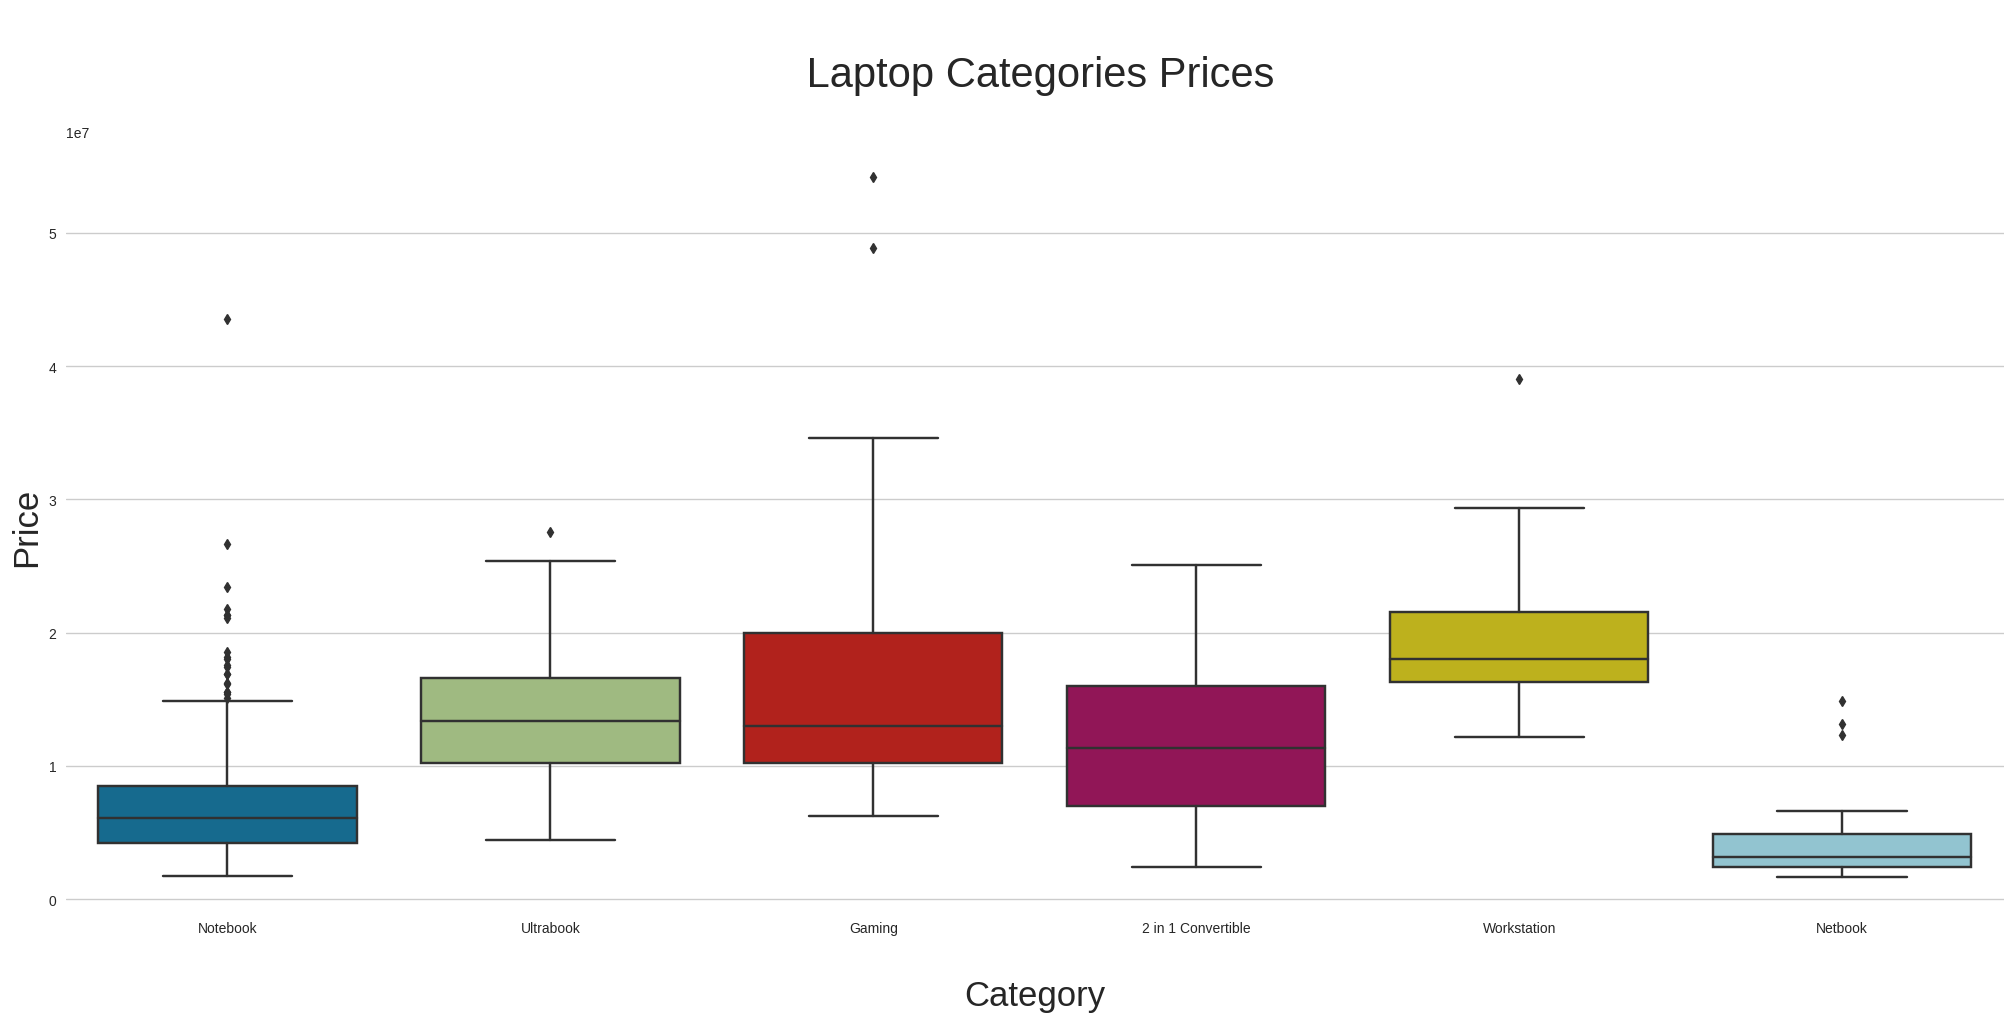

In [37]:
print("Let's have a look on the price distribution of laptop's categories :")
plt.subplots(figsize=(25, 10))

p=sns.boxplot(x=train["category"],y=train["price"],order=train["category"].value_counts().index)
p.axes.set_title("\n Laptop Categories Prices\n",fontsize=30)
p.axes.set_xlabel("\nCategory",fontsize=25)
p.axes.set_ylabel("Price",fontsize=25)

sns.despine(left=True, bottom=True)
plt.show()

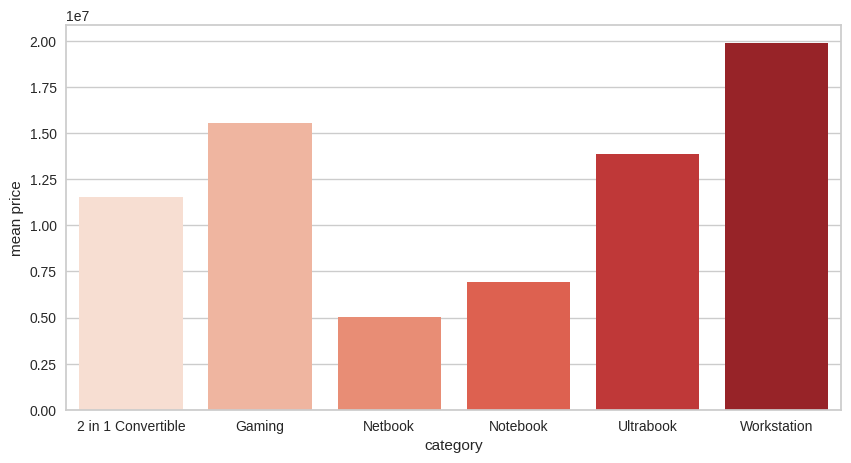

In [38]:
compare_means(train,'category','price')

## Operating System

In [39]:
train["operating system"]

0        macOS
1        macOS
2        No OS
3        macOS
4        macOS
        ...   
972    Windows
973    Windows
974    Windows
975    Windows
976    Windows
Name: operating system, Length: 977, dtype: object

In [40]:
train["operating system"].value_counts()

Windows      837
No OS         52
Linux         48
Chrome OS     22
macOS         13
Mac OS         4
Android        1
Name: operating system, dtype: int64

In [41]:
train["operating system"].describe()

count         977
unique          7
top       Windows
freq          837
Name: operating system, dtype: object

In [42]:
train["operating system"].unique()

array(['macOS', 'No OS', 'Windows', 'Mac OS', 'Linux', 'Android',
       'Chrome OS'], dtype=object)

Let's have a look on the ratio of Laptop's Operating Systems :


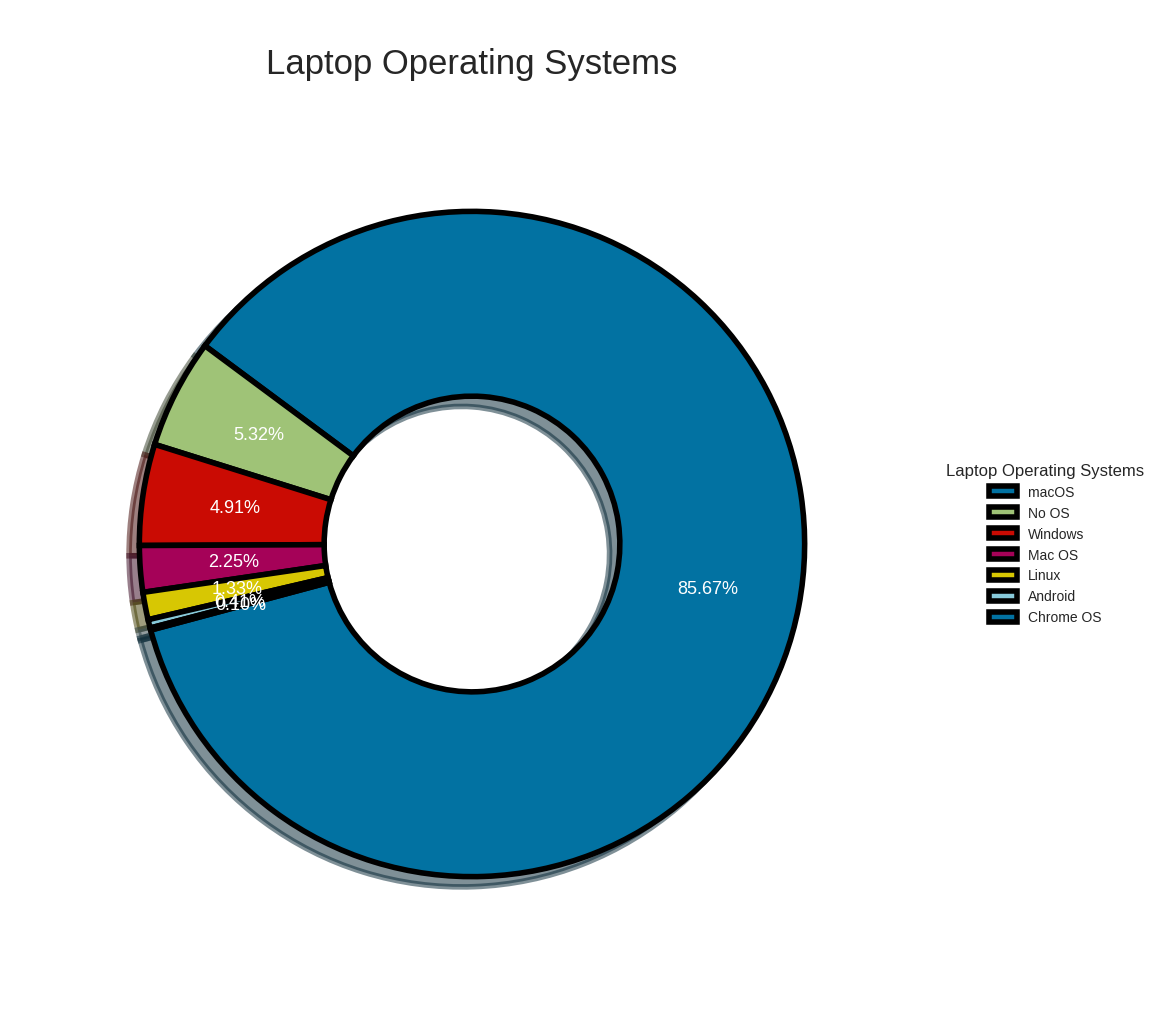

In [43]:
print(f"Let's have a look on the ratio of Laptop's Operating Systems :")
plt.subplots(figsize=(12, 12))

labels = "macOS","No OS","Windows","Mac OS","Linux", "Android", "Chrome OS"
size = 0.5

wedges, texts, autotexts = plt.pie([train["operating system"].value_counts().values[0],
                                    train["operating system"].value_counts().values[1],
                                    train["operating system"].value_counts().values[2],
                                    train["operating system"].value_counts().values[3],
                                    train["operating system"].value_counts().values[4],
                                    train["operating system"].value_counts().values[5],
                                    train["operating system"].value_counts().values[6]],
                                    explode = (0,0,0,0,0,0,0),
                                    textprops=dict(size= 13, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.72,
                                    radius=.9, 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black", 
                                    linewidth = 4),
                                    startangle = -165)

plt.legend(wedges, labels, title="Laptop Operating Systems",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nLaptop Operating Systems",fontsize=25)
plt.show()

Let's have a look at the different laptop operating systems:


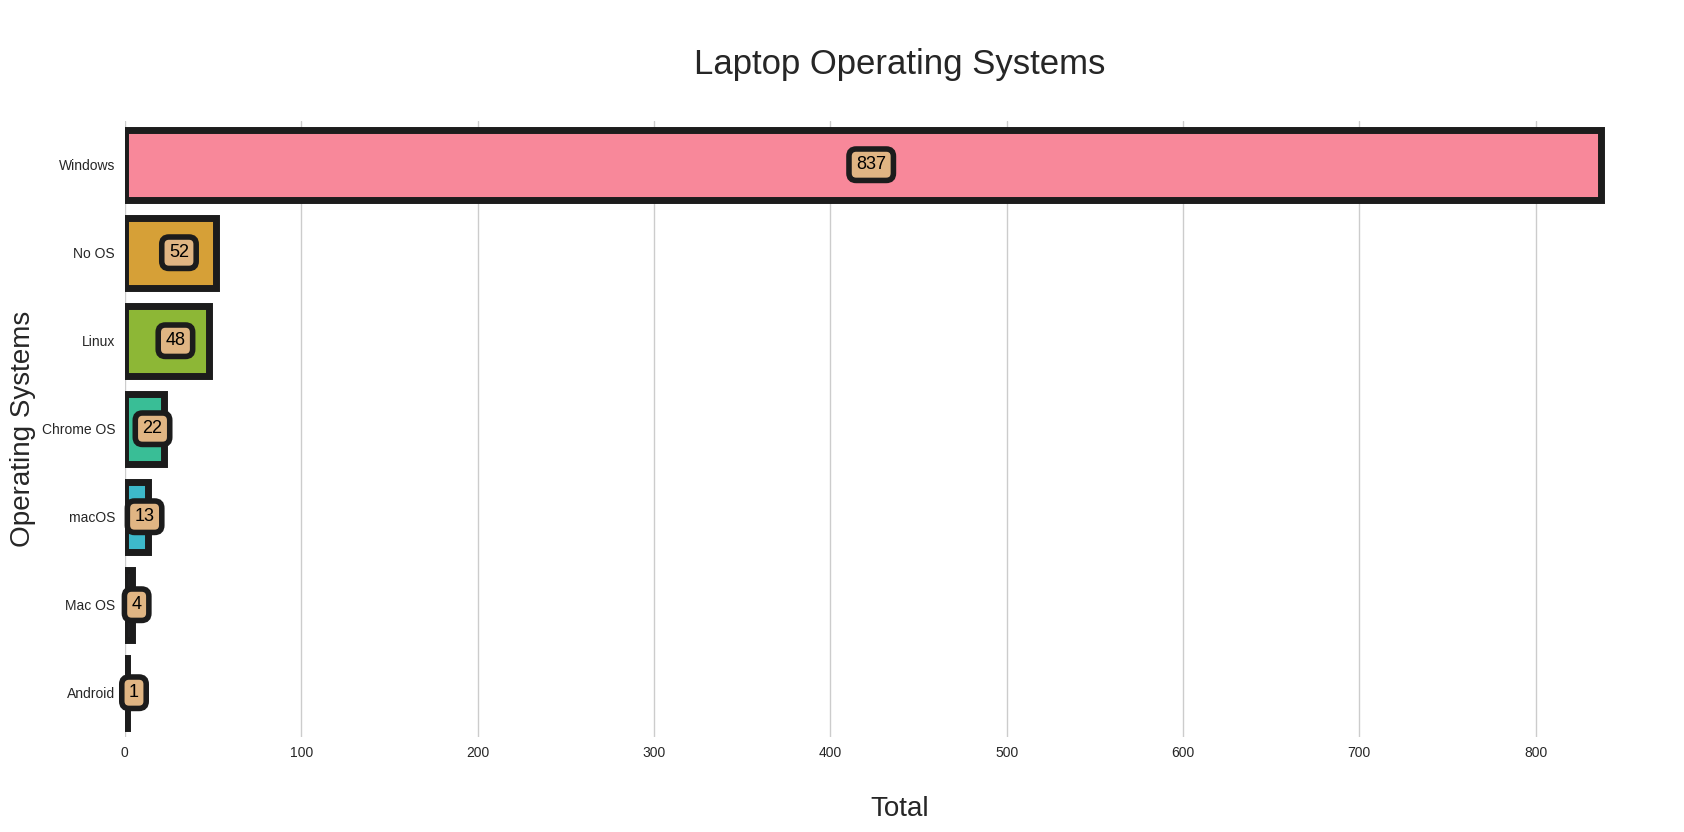

In [44]:
print("Let's have a look at the different laptop operating systems:")
plt.subplots(figsize=(20, 8))
p=sns.countplot(y=train["operating system"],order=train["operating system"].value_counts().index, saturation=1, edgecolor = "#1c1c1c", linewidth = 5)
# p.axes.set_yscale("symlog")
p.axes.set_title("\nLaptop Operating Systems\n",fontsize=25)
p.axes.set_ylabel("Operating Systems",fontsize=20)
p.axes.set_xlabel("\nTotal",fontsize=20)
p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=13,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "#e0b583", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

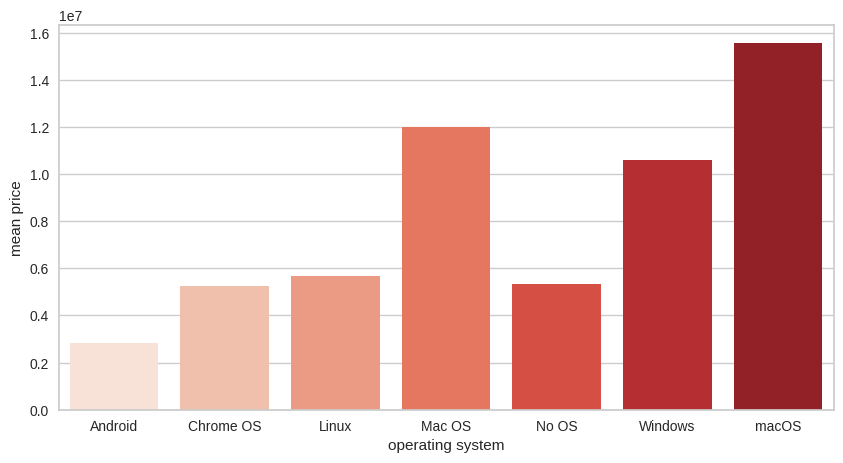

In [45]:
compare_means(train,'operating system','price')

Let's have a look on the price distribution of laptop's Operating Systems :


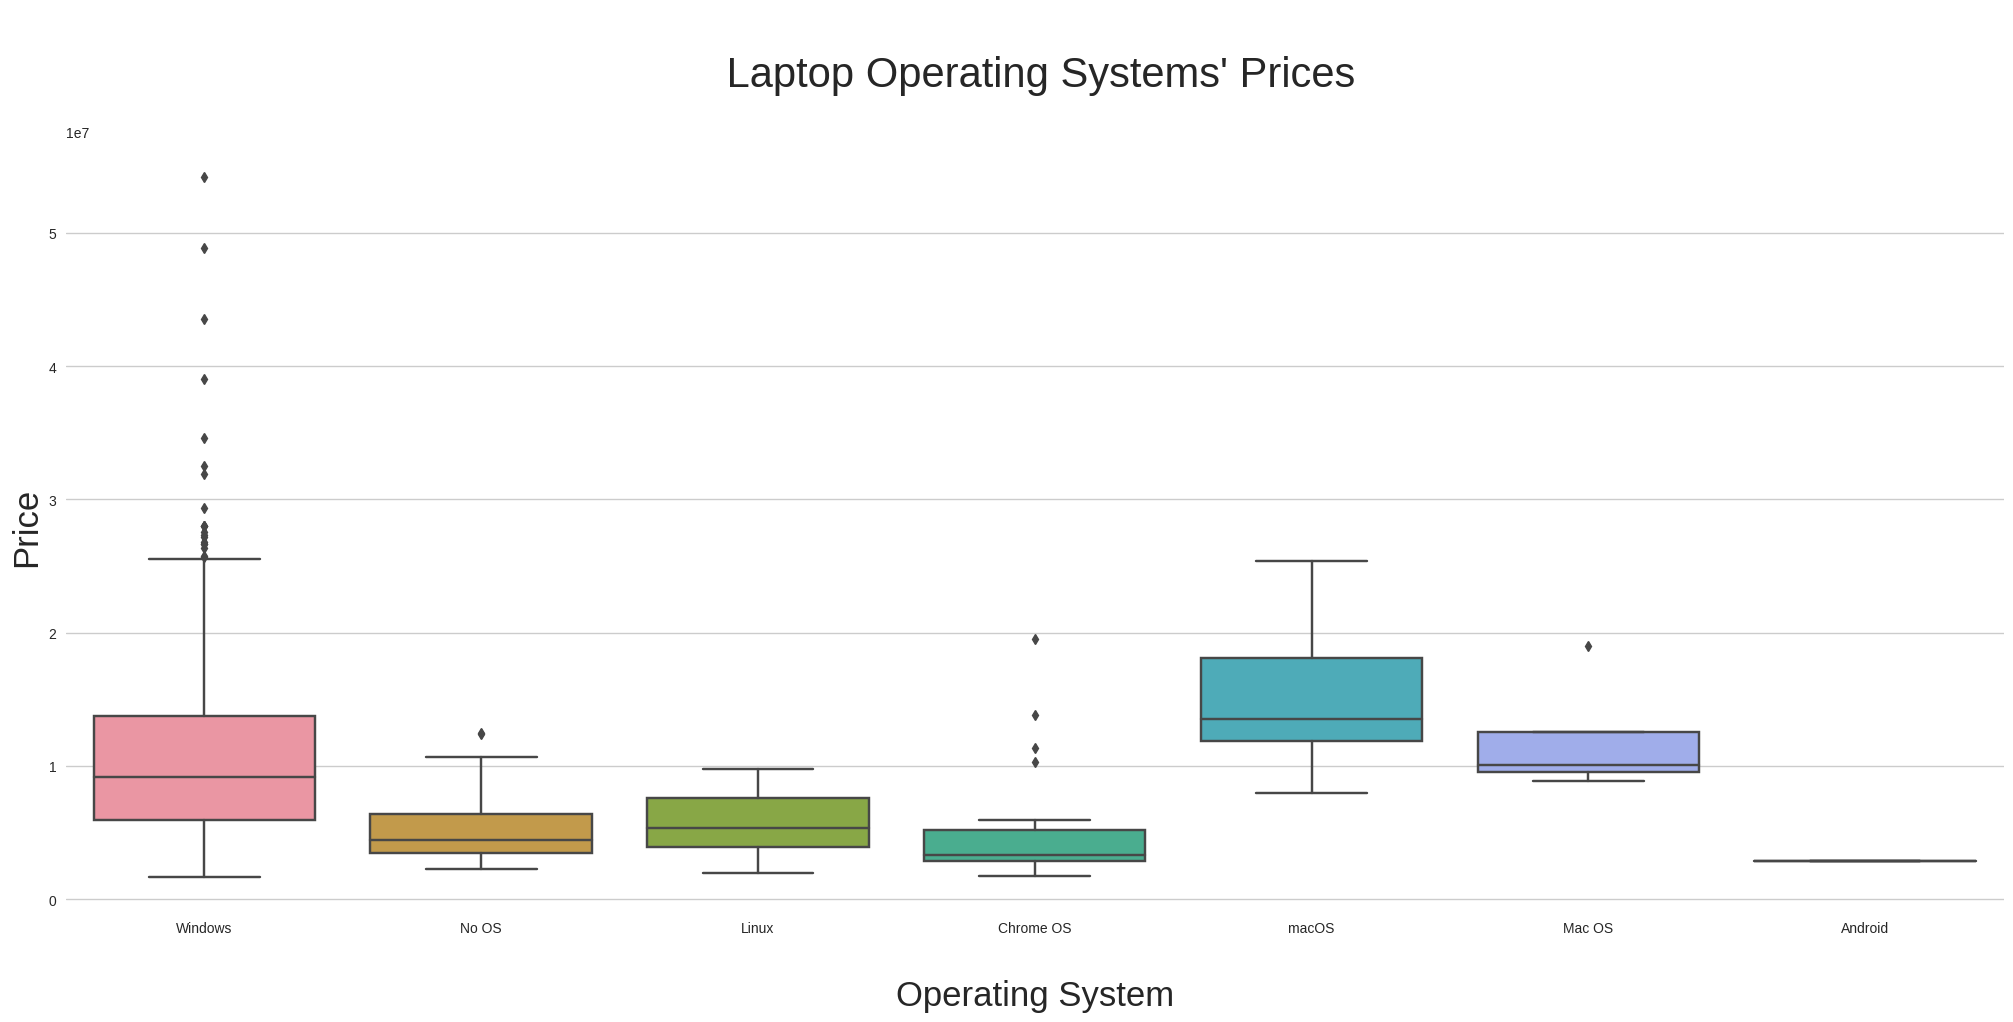

In [46]:
print("Let's have a look on the price distribution of laptop's Operating Systems :")
plt.subplots(figsize=(25, 10))

p=sns.boxplot(x=train["operating system"],y=train["price"],order=train["operating system"].value_counts().index)
p.axes.set_title("\n Laptop Operating Systems' Prices\n",fontsize=30)
p.axes.set_xlabel("\nOperating System",fontsize=25)
p.axes.set_ylabel("Price",fontsize=25)

sns.despine(left=True, bottom=True)
plt.show()

## Operating System Version

In [47]:
train["operating system version"].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: operating system version, dtype: object

In [48]:
print("There are {} null values".format(train["operating system version"].isnull().sum()))

There are 136 null values


In [49]:
print("The percentage of missing values is: {}".format(train["operating system version"].isnull().sum() / len(train["operating system version"]) * 100) +"%")

The percentage of missing values is: 13.920163766632548%


In [50]:
#Filling null values with the mode of our dataset.
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
train["operating system version"] = imputer.fit_transform(train["operating system version"].values.reshape(-1,1))[:,0]

In [51]:
train["operating system version"].describe()

count     977
unique      4
top        10
freq      955
Name: operating system version, dtype: object

In [52]:
train["operating system version"].unique()

array(['10', 'X', '10 S', '7'], dtype=object)

Let's have a look on the ratio of Operating Systems Version :


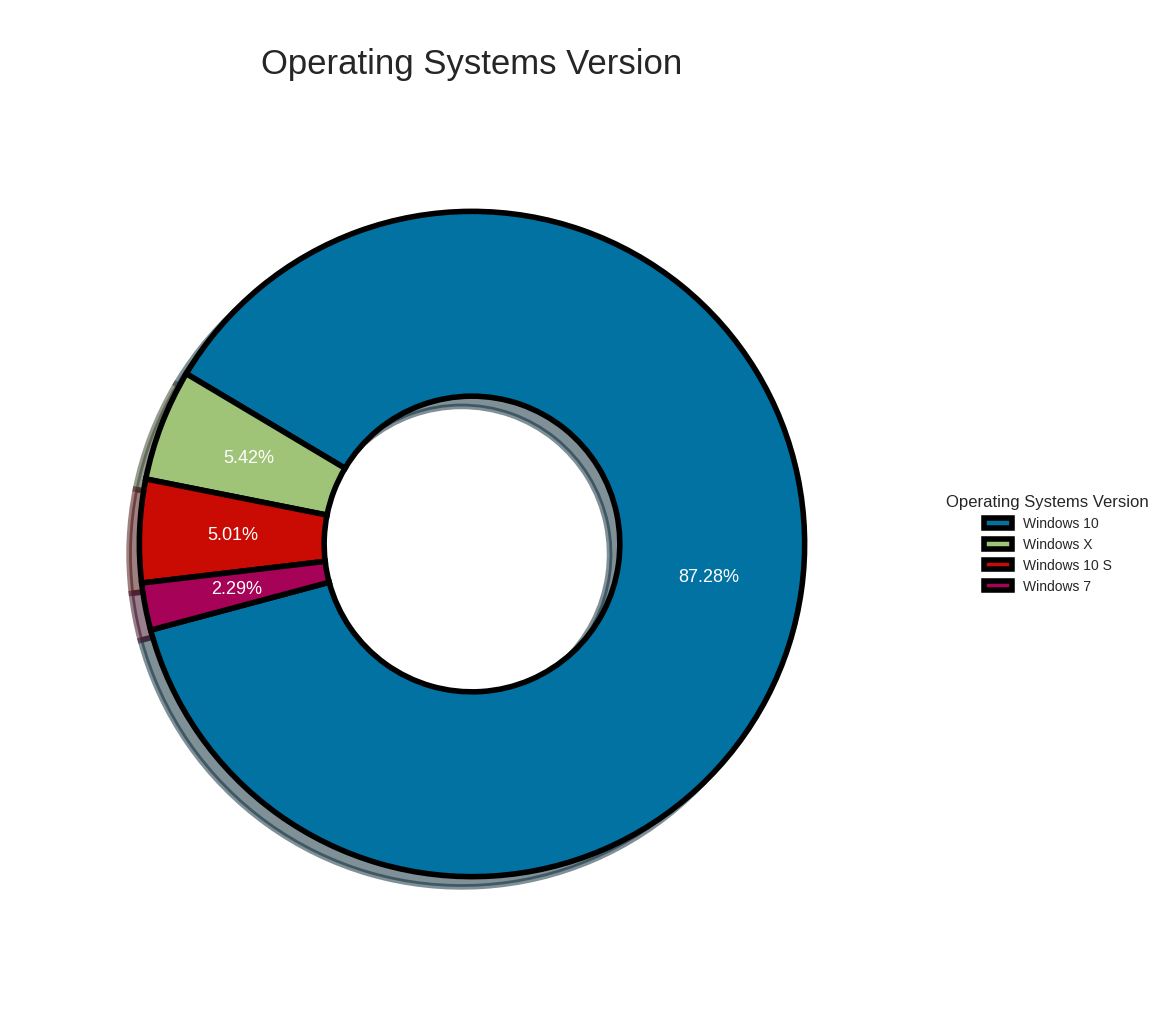

In [53]:
print(f"Let's have a look on the ratio of Operating Systems Version :")
plt.subplots(figsize=(12, 12))

labels = "Windows 10","Windows X","Windows 10 S","Windows 7"
size = 0.5

wedges, texts, autotexts = plt.pie([train["operating system"].value_counts().values[0],
                                    train["operating system"].value_counts().values[1],
                                    train["operating system"].value_counts().values[2],
                                    train["operating system"].value_counts().values[3]],
                                    explode = (0,0,0,0),
                                    textprops=dict(size= 13, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.72,
                                    radius=.9, 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black", 
                                    linewidth = 4),
                                    startangle = -165)

plt.legend(wedges, labels, title="Operating Systems Version",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nOperating Systems Version",fontsize=25)
plt.show()

Let's have a look at the different laptop operating systems:


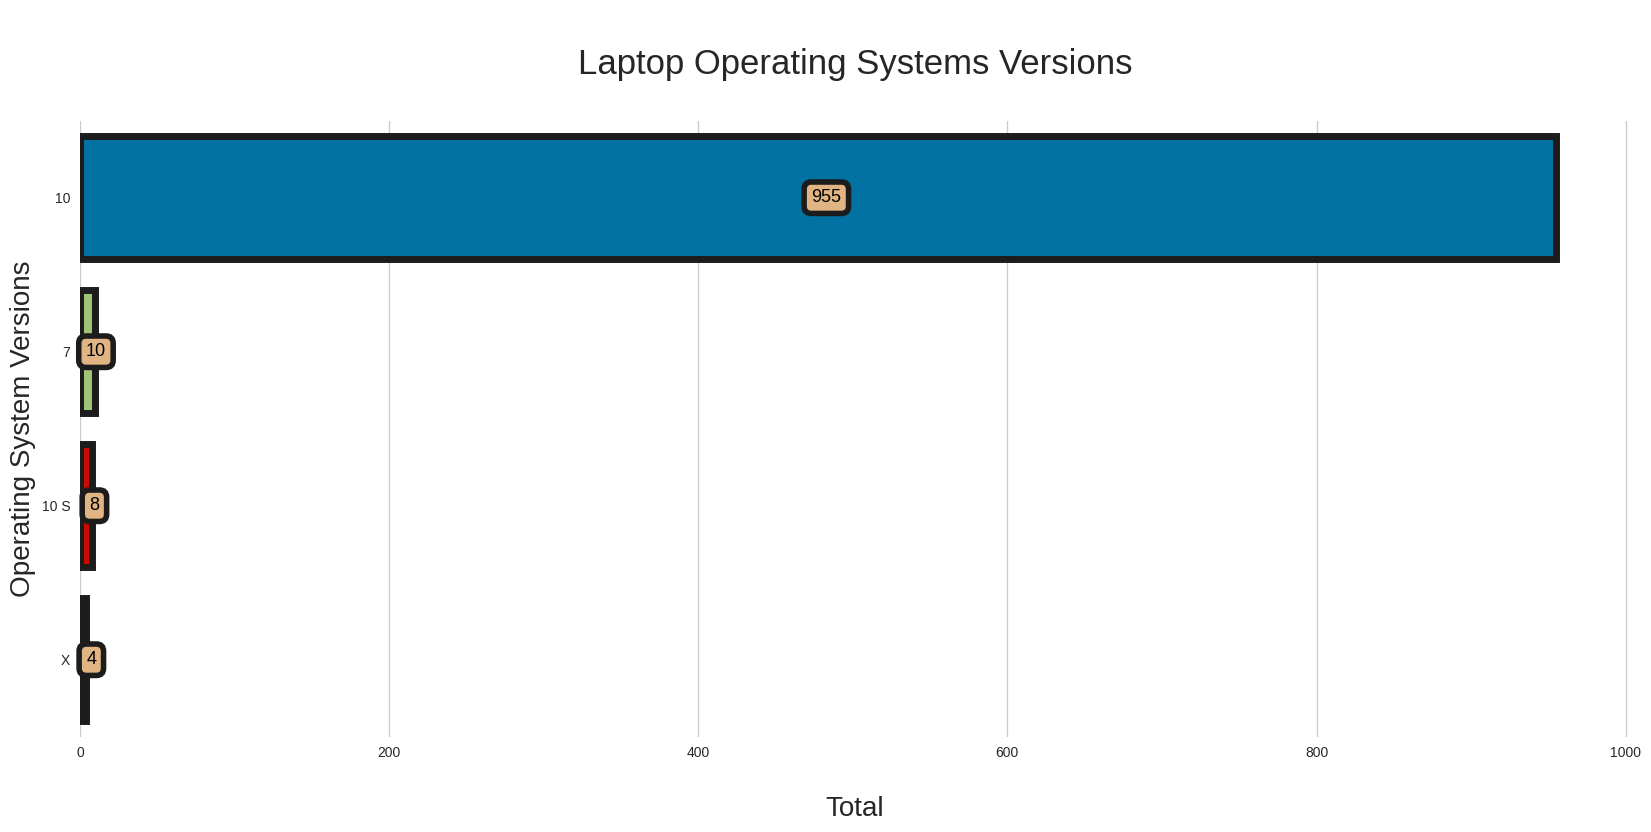

In [54]:
print("Let's have a look at the different laptop operating systems:")
plt.subplots(figsize=(20, 8))
p=sns.countplot(y=train["operating system version"],order=train["operating system version"].value_counts().index, saturation=1, edgecolor = "#1c1c1c", linewidth = 5)
# p.axes.set_yscale("symlog")
p.axes.set_title("\nLaptop Operating Systems Versions\n",fontsize=25)
p.axes.set_ylabel("Operating System Versions",fontsize=20)
p.axes.set_xlabel("\nTotal",fontsize=20)
p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=13,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "#e0b583", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

Let's have a look on the price distribution of laptop's Operating Systems Versions:


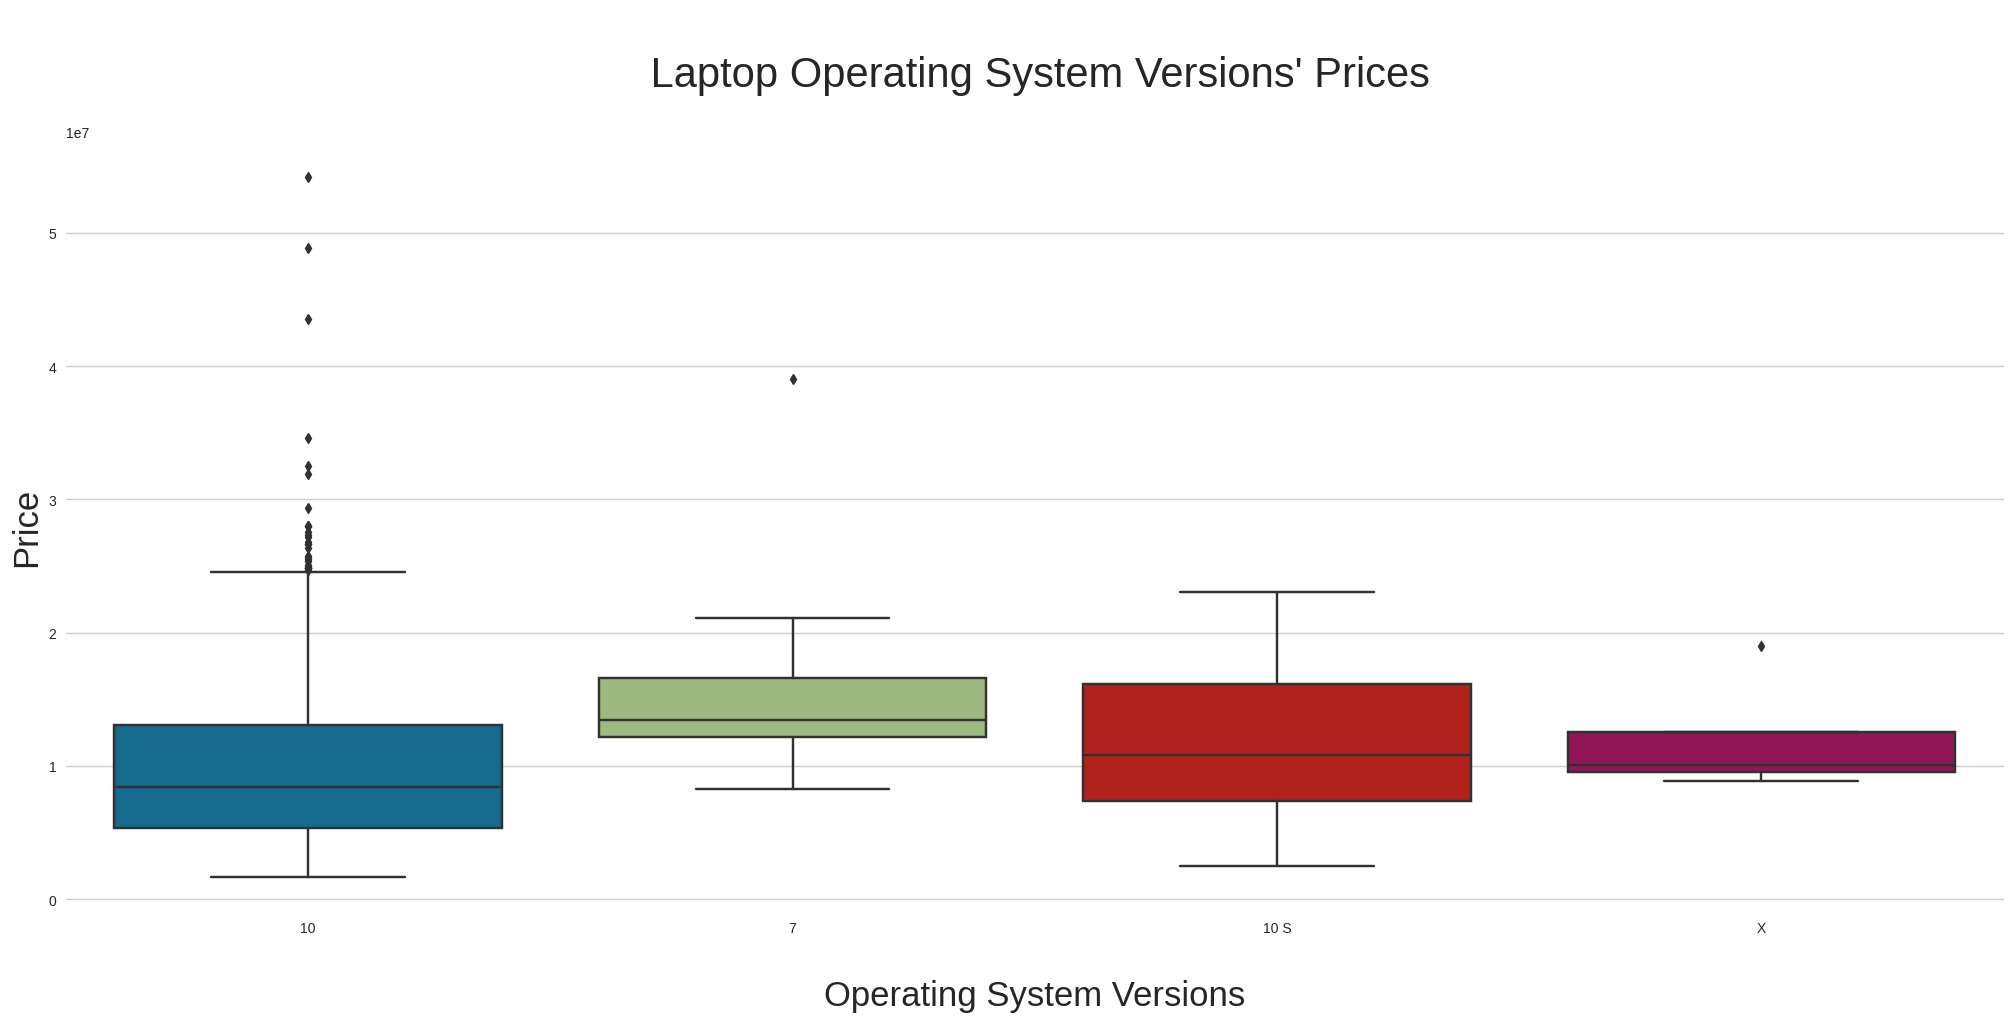

In [55]:
print("Let's have a look on the price distribution of laptop's Operating Systems Versions:")
plt.subplots(figsize=(25, 10))

p=sns.boxplot(x=train["operating system version"],y=train["price"],order=train["operating system version"].value_counts().index)
p.axes.set_title("\n Laptop Operating System Versions' Prices\n",fontsize=30)
p.axes.set_xlabel("\nOperating System Versions",fontsize=25)
p.axes.set_ylabel("Price",fontsize=25)

sns.despine(left=True, bottom=True)
plt.show()

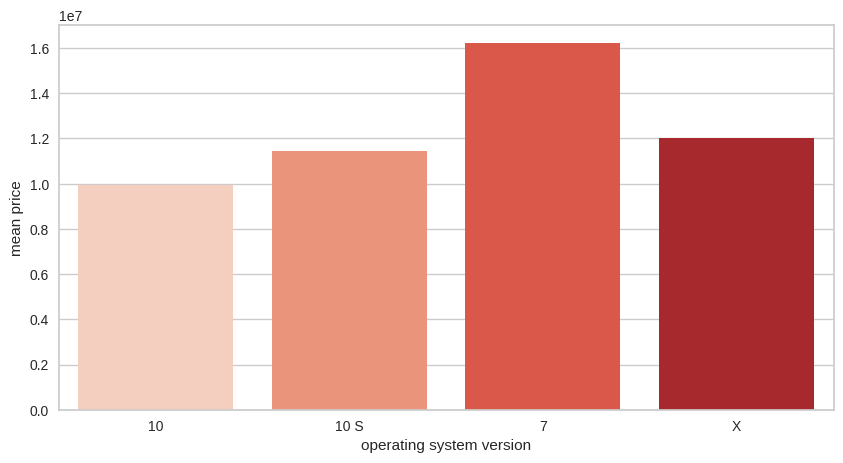

In [56]:
compare_means(train,'operating system version','price')

## Weight

In [57]:
train["weight"].head()

0    1.37kg
1    1.34kg
2    1.86kg
3    1.83kg
4    1.37kg
Name: weight, dtype: object

In [58]:
def clean_weight(train):
    train['weight'] = train['weight'].str.replace('kg','')
    train['weight'] = train['weight'].str.replace('s', '').astype(float)
    return train

In [59]:
train = clean_weight(train)
test = clean_weight(test)

In [60]:
train["weight"].value_counts()

2.20    99
2.10    45
2.00    40
2.50    32
2.40    27
        ..
1.94     1
4.60     1
4.50     1
2.29     1
2.75     1
Name: weight, Length: 160, dtype: int64

In [61]:
test["weight"].value_counts()

2.20    27
2.40    17
2.30    16
2.10    13
2.04    11
        ..
1.05     1
1.10     1
1.35     1
3.35     1
3.58     1
Name: weight, Length: 94, dtype: int64

In [62]:
train["weight"].value_counts()

2.20    99
2.10    45
2.00    40
2.50    32
2.40    27
        ..
1.94     1
4.60     1
4.50     1
2.29     1
2.75     1
Name: weight, Length: 160, dtype: int64

In [63]:
train["weight"].describe()

count    977.000000
mean       2.039128
std        0.666009
min        0.690000
25%        1.500000
50%        2.020000
75%        2.300000
max        4.700000
Name: weight, dtype: float64

<Axes: xlabel='weight', ylabel='Density'>

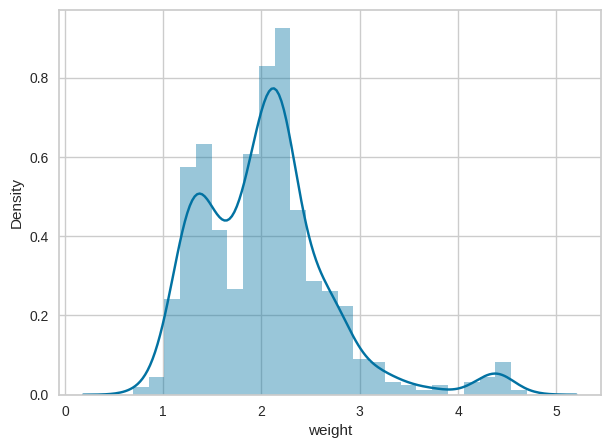

In [64]:
plt.figure(figsize = (7, 5))
sns.distplot(train["weight"])

In [65]:
# Calculating the Fisher-Pearson correlation of Skewness:
print(skew(train["weight"]))

1.1831011510738085


In [66]:
print(kurtosis(train["weight"]))

2.485130279552717


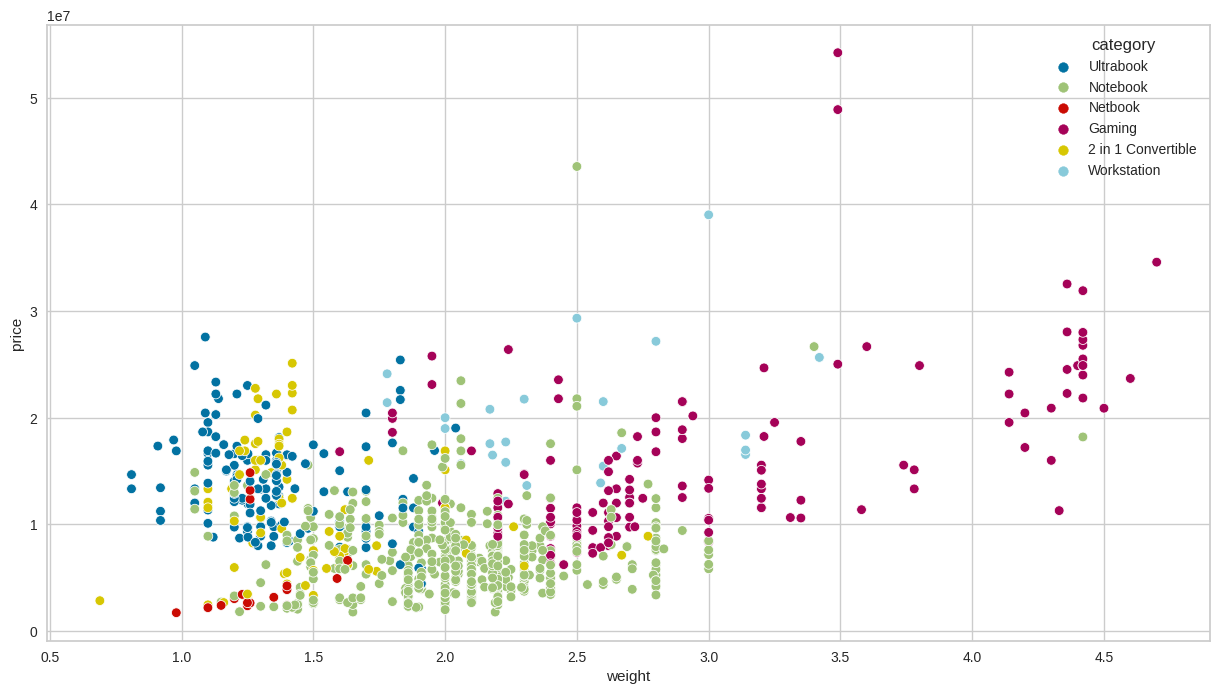

In [67]:
plt.subplots(figsize=(15, 8))
sns.scatterplot(x = train["weight"], y = train["price"], hue = train["category"])
plt.show()

### RAM

In [68]:
train["ram"].head()

0     8GB
1     8GB
2     8GB
3    16GB
4     8GB
Name: ram, dtype: object

#### RAM sizes are numerical variables, however, they're treated here as categorical. That's why we have to get rid of "GB" and change the data into numerical.

In [69]:
train["ram"] = train["ram"].str.replace('GB', '')
train["ram"] = train["ram"].astype(float)
train["ram"].head()

0     8.0
1     8.0
2     8.0
3    16.0
4     8.0
Name: ram, dtype: float64

In [70]:
test["ram"] = test["ram"].str.replace("GB", "")
test["ram"] = test["ram"].astype(float)
test["ram"].head()

0     6.0
1    16.0
2    12.0
3     4.0
4     6.0
Name: ram, dtype: float64

In [71]:
test["ram"].value_counts()

8.0     136
4.0     104
16.0     50
6.0      17
2.0      12
12.0      4
64.0      1
32.0      1
Name: ram, dtype: int64

In [72]:
train["ram"].describe()

count    977.000000
mean       8.528147
std        4.997487
min        2.000000
25%        4.000000
50%        8.000000
75%        8.000000
max       32.000000
Name: ram, dtype: float64

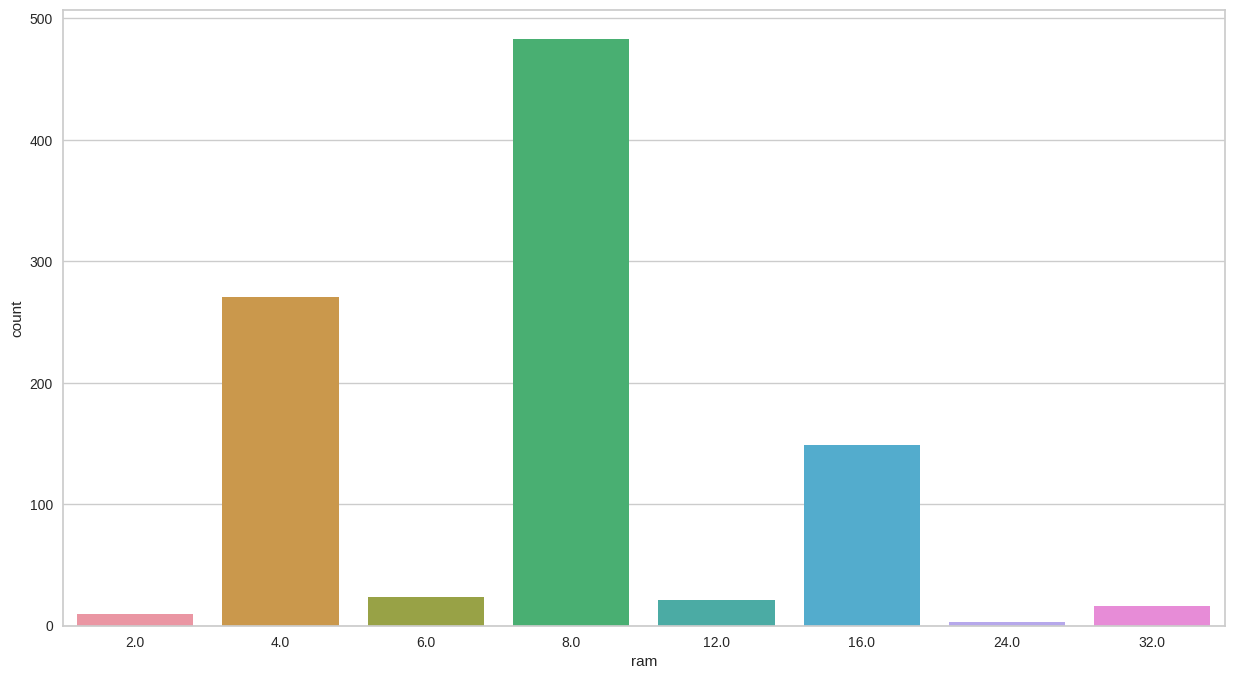

In [73]:
plt.subplots(figsize=(15, 8))
sns.countplot(x='ram', data=train)
plt.show()

#### CPU and GPU

In [74]:
train["cpu"].head()

0          Intel Core i5 2.3GHz
1          Intel Core i5 1.8GHz
2    Intel Core i5 7200U 2.5GHz
3          Intel Core i7 2.7GHz
4          Intel Core i5 3.1GHz
Name: cpu, dtype: object

In [75]:
train["gpu"].head()

0    Intel Iris Plus Graphics 640
1          Intel HD Graphics 6000
2           Intel HD Graphics 620
3              AMD Radeon Pro 455
4    Intel Iris Plus Graphics 650
Name: gpu, dtype: object

In [76]:
def manufacturer(train):
    train['cpu_manftr'] = train['cpu'].str.extract(r'^(\w+)') 
    train['gpu_manftr'] = train['gpu'].str.extract(r'^(\w+)') 
    return train

In [77]:
train = manufacturer(train)
test = manufacturer(test)

In [78]:
train.head()

,manufacturer,model name,category,screen size,screen,cpu,ram,storage,gpu,operating system,operating system version,weight,price,cpu_manftr,gpu_manftr
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,10,1.37,11912523.48,Intel,Intel
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,10,1.34,7993374.48,Intel,Intel
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,10,1.86,5112900.00,Intel,Intel
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,10,1.83,22563005.40,Intel,AMD
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,10,1.37,16037611.20,Intel,Intel


In [79]:
test.head()

,manufacturer,model name,category,screen size,screen,cpu,ram,storage,gpu,operating system,operating system version,weight,price,cpu_manftr,gpu_manftr
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,"15.6""",1366x768,Intel Core i7 7500U 2.7GHz,6.0,1TB HDD,Intel HD Graphics 620,Windows,10,2.04,5148468.0,Intel,Intel
1,Asus,Rog GL753VE-DS74,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16.0,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99,15552108.0,Intel,Nvidia
2,Dell,Inspiron 7579,2 in 1 Convertible,"15.6""",IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12.0,512GB SSD,Intel HD Graphics 620,Windows,10,2.19,11550708.0,Intel,Intel
3,Toshiba,Portege Z30-C-1CV,Notebook,"13.3""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4.0,128GB SSD,Intel HD Graphics 520,Windows,7,1.20,10625940.0,Intel,Intel
4,Lenovo,IdeaPad 320-15ABR,Notebook,"15.6""",Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6.0,256GB SSD,AMD Radeon 530,Windows,10,2.20,4881708.0,AMD,AMD


#### CPU Manufacturers

In [80]:
train["cpu_manftr"].value_counts()

Intel    929
AMD       48
Name: cpu_manftr, dtype: int64

In [81]:
train["cpu_manftr"].describe()

count       977
unique        2
top       Intel
freq        929
Name: cpu_manftr, dtype: object

Let's have a look on the ratio of CPU Manufacturers :


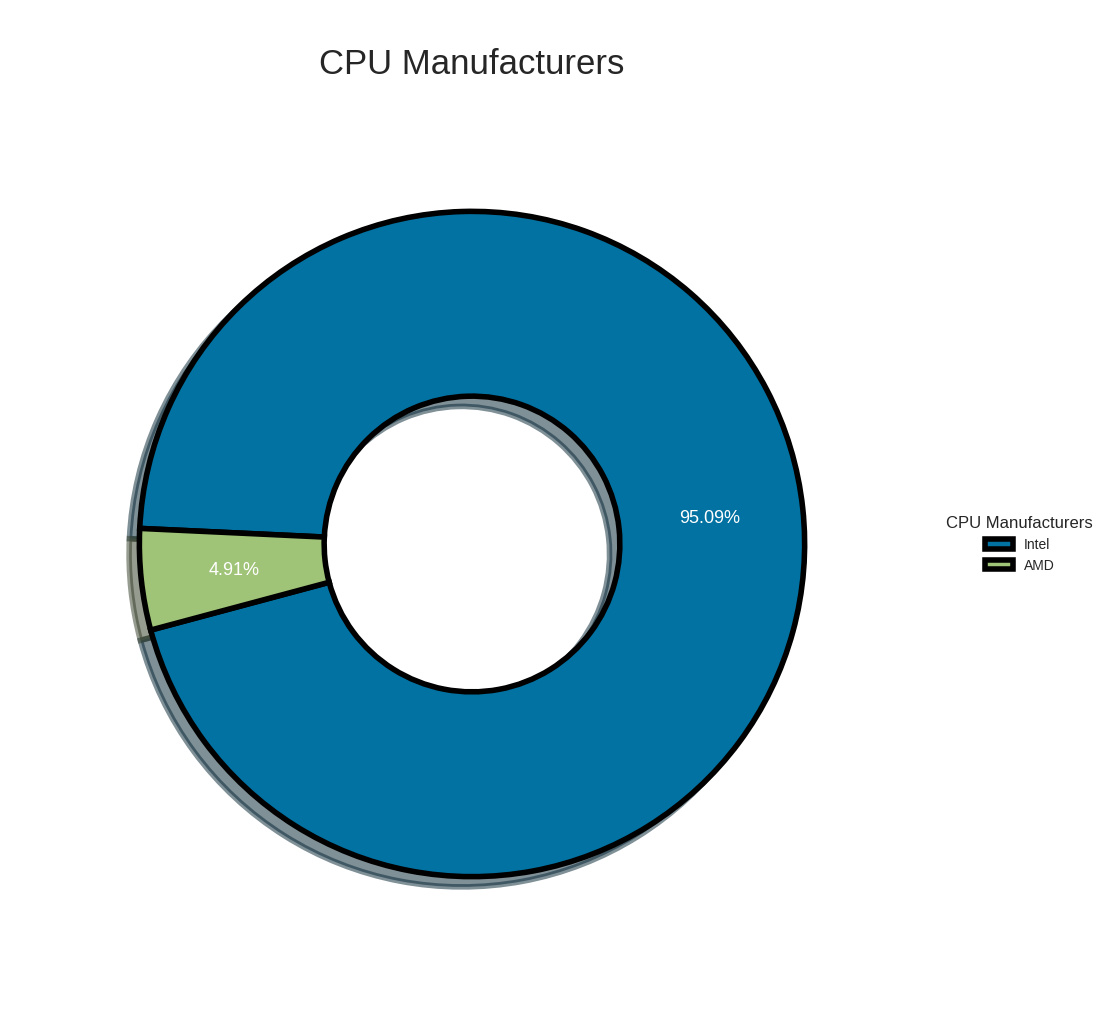

In [82]:
print(f"Let's have a look on the ratio of CPU Manufacturers :")
plt.subplots(figsize=(12, 12))

labels = "Intel","AMD"
size = 0.5

wedges, texts, autotexts = plt.pie([train["cpu_manftr"].value_counts().values[0],
                                    train["cpu_manftr"].value_counts().values[1]],
                                    explode = (0,0),
                                    textprops=dict(size= 13, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.72,
                                    radius=.9, 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black", 
                                    linewidth = 4),
                                    startangle = -165)

plt.legend(wedges, labels, title="CPU Manufacturers",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nCPU Manufacturers",fontsize=25)
plt.show()

Let's have a look at the different laptop cpu manufacturers


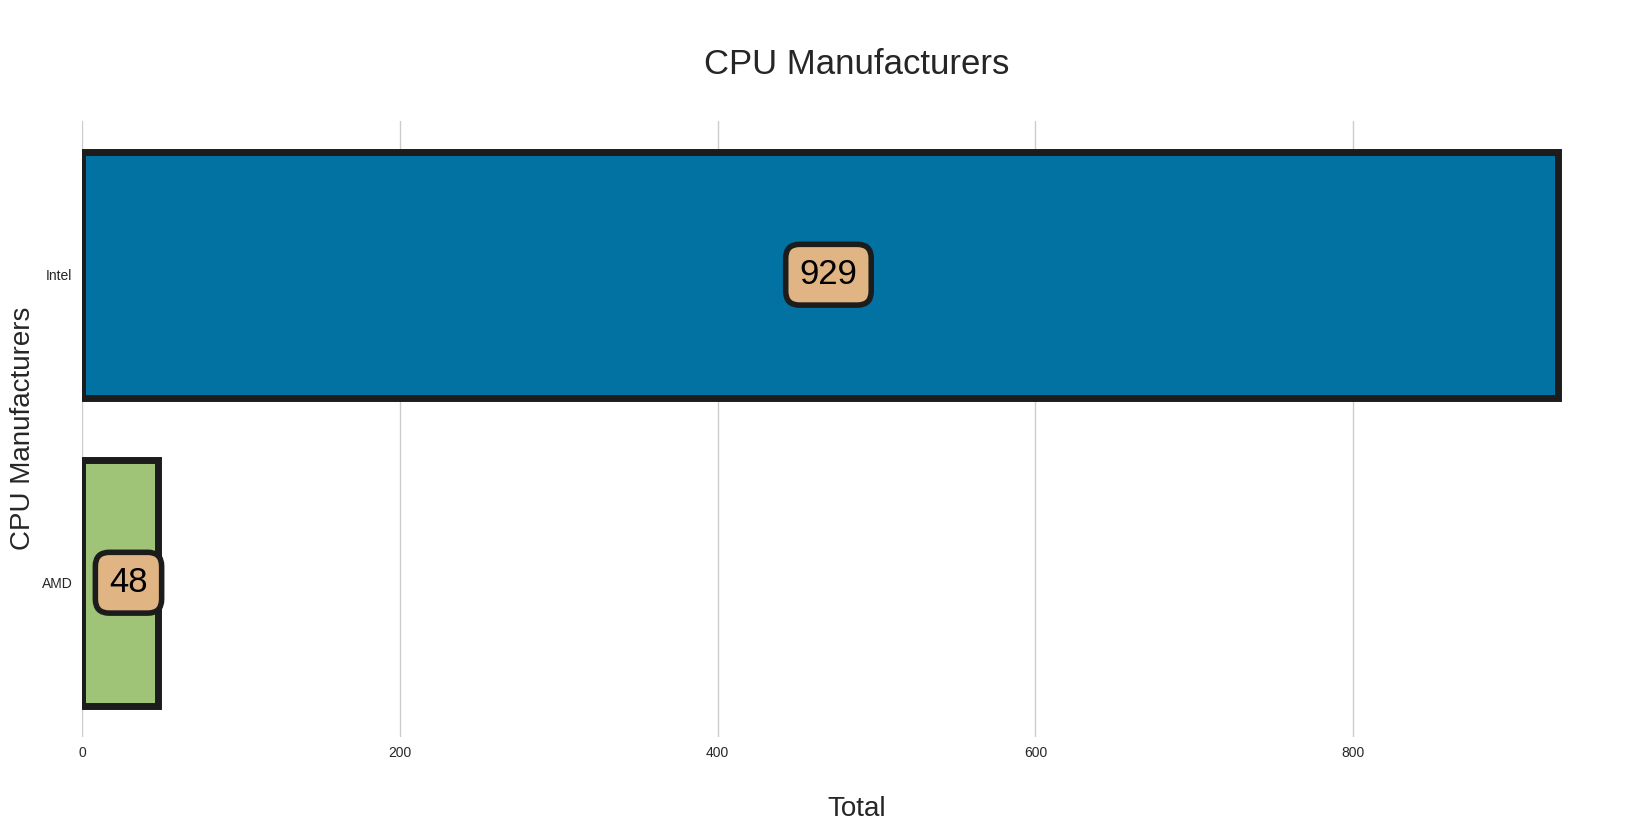

In [83]:
print("Let's have a look at the different laptop cpu manufacturers")
plt.subplots(figsize=(20, 8))
p=sns.countplot(y=train["cpu_manftr"],order=train["cpu_manftr"].value_counts().index, saturation=1, edgecolor = "#1c1c1c", linewidth = 5)
# p.axes.set_yscale("symlog")
p.axes.set_title("\nCPU Manufacturers\n",fontsize=25)
p.axes.set_ylabel("CPU Manufacturers",fontsize=20)
p.axes.set_xlabel("\nTotal",fontsize=20)
p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=25,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "#e0b583", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

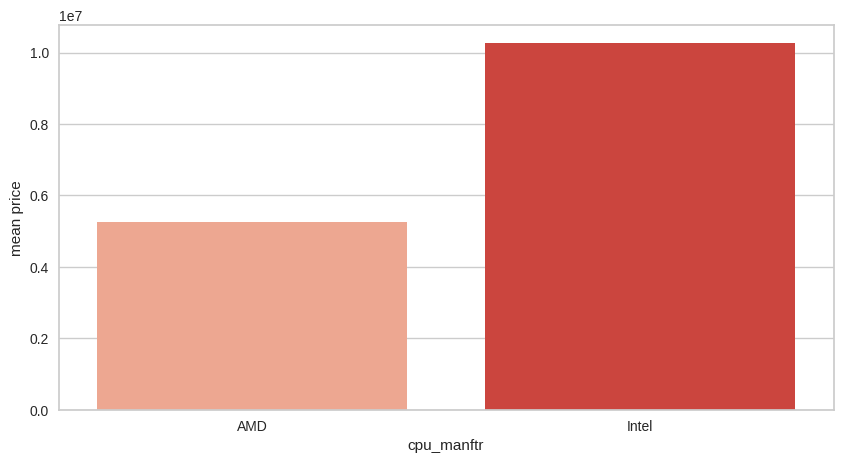

In [84]:
compare_means(train,'cpu_manftr','price')

#### GPU Manufacturers

In [85]:
train["gpu_manftr"].head()

0    Intel
1    Intel
2    Intel
3      AMD
4    Intel
Name: gpu_manftr, dtype: object

In [86]:
train["gpu_manftr"].describe()

count       977
unique        3
top       Intel
freq        525
Name: gpu_manftr, dtype: object

Let's have a look on the ratio of GPU Manufacturers :


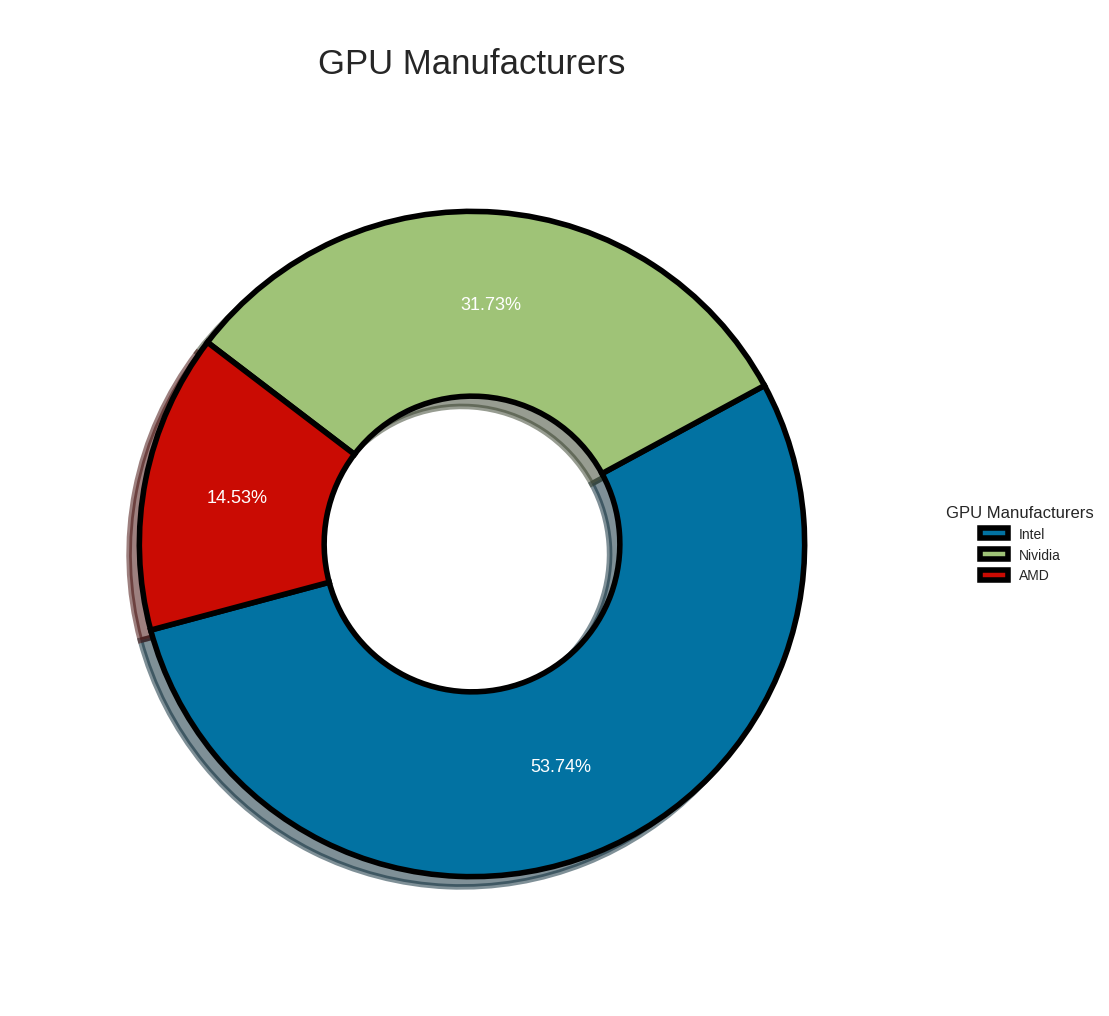

In [87]:
print(f"Let's have a look on the ratio of GPU Manufacturers :")
plt.subplots(figsize=(12, 12))

labels = "Intel","Nividia", "AMD"
size = 0.5

wedges, texts, autotexts = plt.pie([train["gpu_manftr"].value_counts().values[0],
                                    train["gpu_manftr"].value_counts().values[1],
                                    train["gpu_manftr"].value_counts().values[2]],
                                    explode = (0,0,0),
                                    textprops=dict(size= 13, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.72,
                                    radius=.9, 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black", 
                                    linewidth = 4),
                                    startangle = -165)

plt.legend(wedges, labels, title="GPU Manufacturers",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nGPU Manufacturers",fontsize=25)
plt.show()

Let's have a look at the different laptop gpu manufacturers


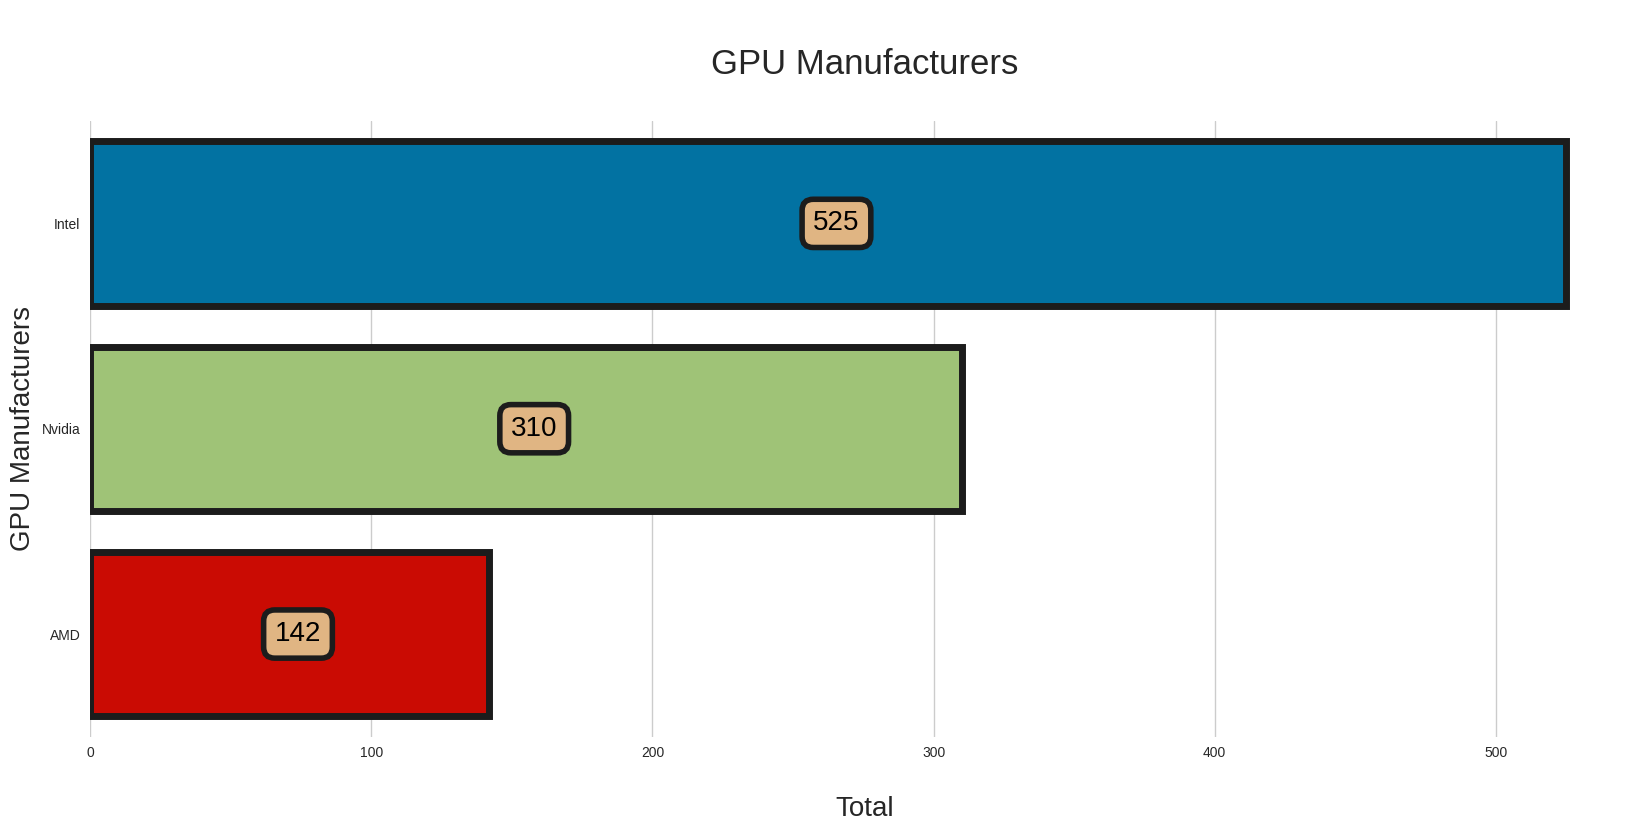

In [88]:
print("Let's have a look at the different laptop gpu manufacturers")
plt.subplots(figsize=(20, 8))
p=sns.countplot(y=train["gpu_manftr"],order=train["gpu_manftr"].value_counts().index, saturation=1, edgecolor = "#1c1c1c", linewidth = 5)
# p.axes.set_yscale("symlog")
p.axes.set_title("\nGPU Manufacturers\n",fontsize=25)
p.axes.set_ylabel("GPU Manufacturers",fontsize=20)
p.axes.set_xlabel("\nTotal",fontsize=20)
p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=20,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "#e0b583", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

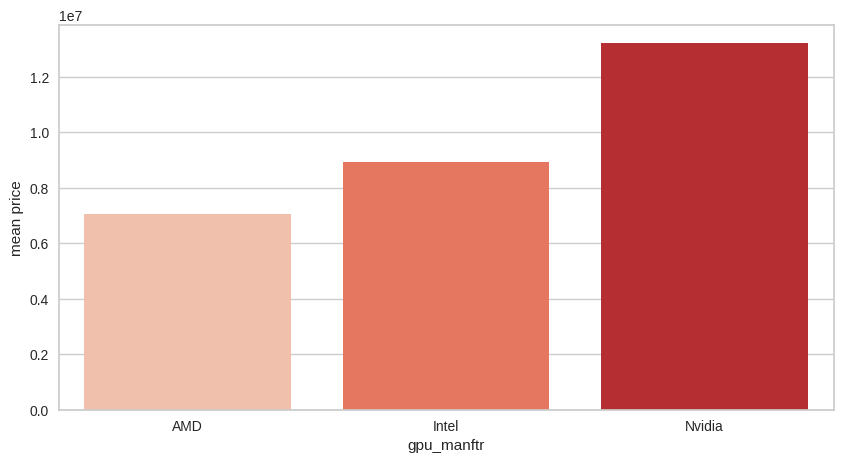

In [89]:
compare_means(train,'gpu_manftr','price')

### Storage

In [90]:
train[" storage"].value_counts()

256GB SSD                        318
1TB HDD                          171
512GB SSD                         91
500GB HDD                         79
128GB SSD +  1TB HDD              71
128GB SSD                         62
256GB SSD +  1TB HDD              52
32GB Flash Storage                29
2TB HDD                           14
512GB SSD +  1TB HDD              13
1TB SSD                           11
256GB SSD +  2TB HDD              10
64GB Flash Storage                 9
16GB Flash Storage                 6
256GB Flash Storage                5
32GB SSD                           5
128GB Flash Storage                4
1GB SSD                            4
256GB SSD +  256GB SSD             2
16GB SSD                           2
1TB SSD +  1TB HDD                 2
512GB SSD +  2TB HDD               2
128GB SSD +  2TB HDD               2
512GB SSD +  512GB SSD             1
512GB SSD +  256GB SSD             1
64GB SSD                           1
64GB Flash Storage +  1TB HDD      1
2

**We can extract lots of informations from this column. We can see that some laptops have 2 hard drives, there are 4 differnt types of disks: 'SSD', ''HDD', 'Hybrid' and 'Flash Storage'. We will create new columns to include all these information**

In [91]:
def extract_from_storage(train):
    train["storage1"] = train[" storage"]
    train['storage1'] = train['storage1'].str.replace('1.0TB','1TB', regex = True)
    train['storage1'] = train['storage1'].str.replace('1TB','1000GB')
    train['storage1'] = train['storage1'].str.replace('2TB','2000GB')
    train['storage1'] = train['storage1'].str.replace('GB','')
    train['storage2'] = train['storage1'].str.replace(r' ','')
    storage1 = []
    storage2 = []
    for i in train['storage2']:
        if len(re.findall(r'\+', i)) == 1: 
            # Double drive
            one = re.findall(r'(\w+)', i)
            storage1.append(one[0])
            storage2.append(one[1])
        else: 
            # Single drive
            one = re.findall(r'(\w+)', i)
            storage1.append(one[0])
            storage2.append('NaN')


    #extracting size and type of primary storage
    storage1size = []
    storage1type = []
    for i in storage1:
        storage1type.append(re.findall(r'(\D\w+)', i)[0])
        storage1size.append(re.findall(r'(\d+)', i)[0])


    #extracting size and type of secondary storage
    storage2size = []
    storage2type = []
    for i in storage2:
        if i != 'NaN':
            storage2type.append(re.findall(r'(\D\w+)',i)[0])
            storage2size.append(re.findall(r'(\d+)',i)[0])
        else:
            storage2type.append('NaN')
            storage2size.append(0)
    train['primarystorage_size'] = storage1size
    train['primarystorage_type'] = storage1type
    train['secondarystorage_size'] = storage2size
    train['secondarystorage_type'] = storage2type
    
    train["primarystorage_size"] = train["primarystorage_size"].astype(float)
    train["secondarystorage_size"] = train["secondarystorage_size"].astype(float)
    train = train.drop(['storage1','storage2',' storage'], axis = 1)
    train = train.replace({'NaN' : np.nan})
    return train

In [92]:
train = extract_from_storage(train)
test = extract_from_storage(test)

In [93]:
train.head()

,manufacturer,model name,category,screen size,screen,cpu,ram,gpu,operating system,operating system version,weight,price,cpu_manftr,gpu_manftr,primarystorage_size,primarystorage_type,secondarystorage_size,secondarystorage_type
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,Intel Iris Plus Graphics 640,macOS,10,1.37,11912523.48,Intel,Intel,128.0,SSD,0.0,NaN
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8.0,Intel HD Graphics 6000,macOS,10,1.34,7993374.48,Intel,Intel,128.0,FlashStorage,0.0,NaN
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,Intel HD Graphics 620,No OS,10,1.86,5112900.00,Intel,Intel,256.0,SSD,0.0,NaN
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,AMD Radeon Pro 455,macOS,10,1.83,22563005.40,Intel,AMD,512.0,SSD,0.0,NaN
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,Intel Iris Plus Graphics 650,macOS,10,1.37,16037611.20,Intel,Intel,256.0,SSD,0.0,NaN


In [94]:
test.head()

,manufacturer,model name,category,screen size,screen,cpu,ram,gpu,operating system,operating system version,weight,price,cpu_manftr,gpu_manftr,primarystorage_size,primarystorage_type,secondarystorage_size,secondarystorage_type
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,"15.6""",1366x768,Intel Core i7 7500U 2.7GHz,6.0,Intel HD Graphics 620,Windows,10,2.04,5148468.0,Intel,Intel,1000.0,HDD,0.0,NaN
1,Asus,Rog GL753VE-DS74,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16.0,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99,15552108.0,Intel,Nvidia,256.0,SSD,1000.0,HDD
2,Dell,Inspiron 7579,2 in 1 Convertible,"15.6""",IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12.0,Intel HD Graphics 620,Windows,10,2.19,11550708.0,Intel,Intel,512.0,SSD,0.0,NaN
3,Toshiba,Portege Z30-C-1CV,Notebook,"13.3""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4.0,Intel HD Graphics 520,Windows,7,1.20,10625940.0,Intel,Intel,128.0,SSD,0.0,NaN
4,Lenovo,IdeaPad 320-15ABR,Notebook,"15.6""",Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6.0,AMD Radeon 530,Windows,10,2.20,4881708.0,AMD,AMD,256.0,SSD,0.0,NaN


<Axes: xlabel='primarystorage_size', ylabel='Density'>

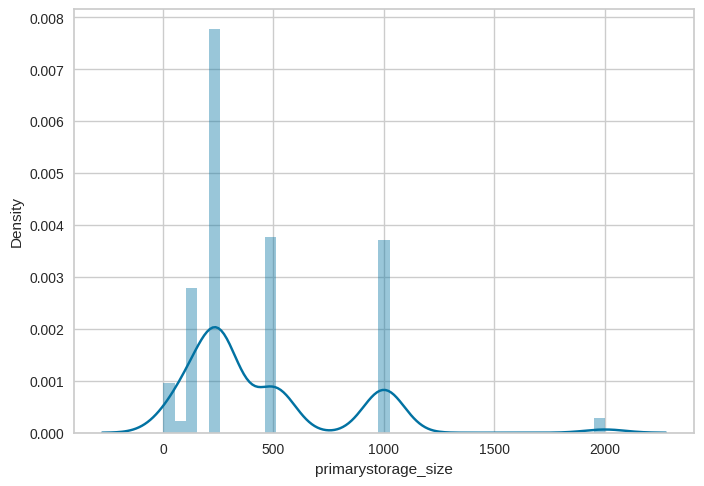

In [95]:
sns.distplot(train["primarystorage_size"])

<Axes: xlabel='secondarystorage_size', ylabel='Density'>

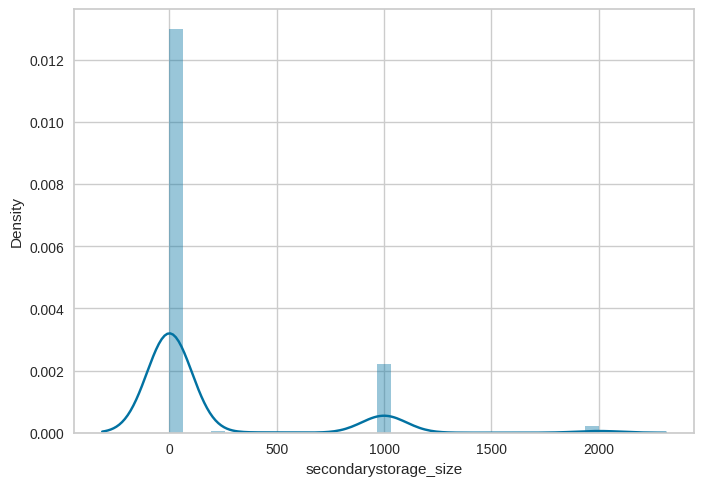

In [96]:
sns.distplot(train["secondarystorage_size"])

In [97]:
train["secondarystorage_type"].isnull().sum()

818

In [98]:
train["secondarystorage_type"] = train["secondarystorage_type"].dropna()

In [99]:
train["secondarystorage_type"].value_counts()

HDD    155
SSD      4
Name: secondarystorage_type, dtype: int64

In [100]:
#Due to lots of null values within the "secondarystorage_type" column, we should drop it
train = train.drop(["secondarystorage_type"], axis = 1)
train.head()

,manufacturer,model name,category,screen size,screen,cpu,ram,gpu,operating system,operating system version,weight,price,cpu_manftr,gpu_manftr,primarystorage_size,primarystorage_type,secondarystorage_size
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,Intel Iris Plus Graphics 640,macOS,10,1.37,11912523.48,Intel,Intel,128.0,SSD,0.0
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8.0,Intel HD Graphics 6000,macOS,10,1.34,7993374.48,Intel,Intel,128.0,FlashStorage,0.0
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,Intel HD Graphics 620,No OS,10,1.86,5112900.00,Intel,Intel,256.0,SSD,0.0
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,AMD Radeon Pro 455,macOS,10,1.83,22563005.40,Intel,AMD,512.0,SSD,0.0
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,Intel Iris Plus Graphics 650,macOS,10,1.37,16037611.20,Intel,Intel,256.0,SSD,0.0


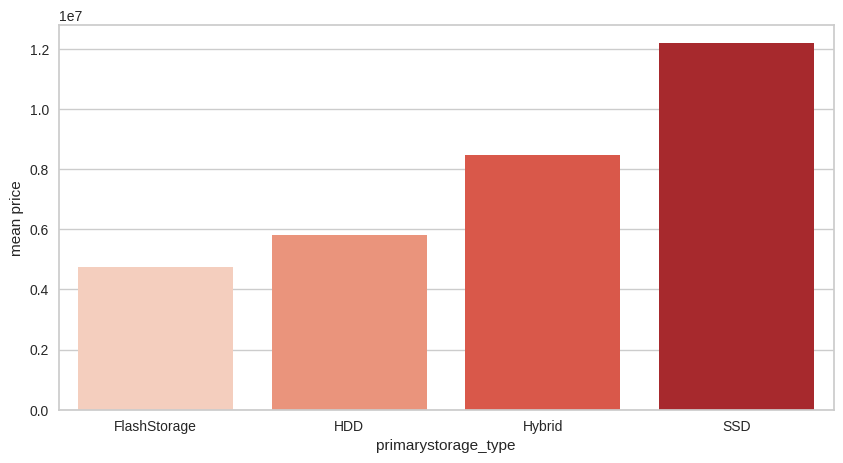

In [101]:
compare_means(train,'primarystorage_type','price')

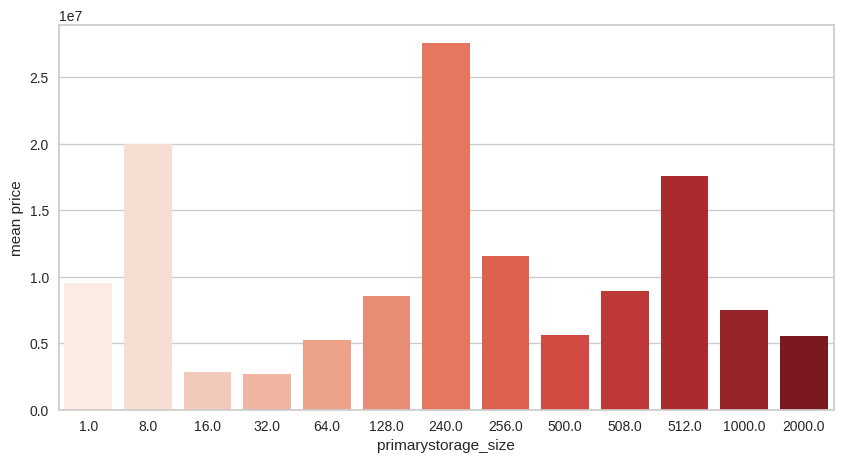

In [102]:
compare_means(train,'primarystorage_size','price')

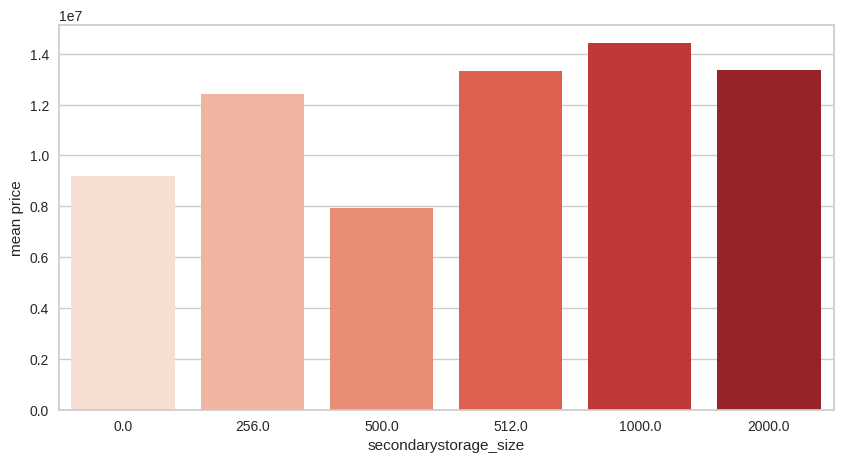

In [103]:
compare_means(train,'secondarystorage_size','price')

### Screen Size

In [104]:
train["screen size"].head()

0    13.3"
1    13.3"
2    15.6"
3    15.4"
4    13.3"
Name: screen size, dtype: object

In [105]:
train["screen size"] = train['screen size'].str.replace('"','')
train['screen size'] = train['screen size'].astype(float)

test["screen size"] = test['screen size'].str.replace('"','')
test['screen size'] = test['screen size'].astype(float)

In [106]:
train.head()

,manufacturer,model name,category,screen size,screen,cpu,ram,gpu,operating system,operating system version,weight,price,cpu_manftr,gpu_manftr,primarystorage_size,primarystorage_type,secondarystorage_size
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,Intel Iris Plus Graphics 640,macOS,10,1.37,11912523.48,Intel,Intel,128.0,SSD,0.0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,Intel HD Graphics 6000,macOS,10,1.34,7993374.48,Intel,Intel,128.0,FlashStorage,0.0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,Intel HD Graphics 620,No OS,10,1.86,5112900.00,Intel,Intel,256.0,SSD,0.0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,AMD Radeon Pro 455,macOS,10,1.83,22563005.40,Intel,AMD,512.0,SSD,0.0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,Intel Iris Plus Graphics 650,macOS,10,1.37,16037611.20,Intel,Intel,256.0,SSD,0.0


In [107]:
test.head()

,manufacturer,model name,category,screen size,screen,cpu,ram,gpu,operating system,operating system version,weight,price,cpu_manftr,gpu_manftr,primarystorage_size,primarystorage_type,secondarystorage_size,secondarystorage_type
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,6.0,Intel HD Graphics 620,Windows,10,2.04,5148468.0,Intel,Intel,1000.0,HDD,0.0,NaN
1,Asus,Rog GL753VE-DS74,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16.0,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99,15552108.0,Intel,Nvidia,256.0,SSD,1000.0,HDD
2,Dell,Inspiron 7579,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12.0,Intel HD Graphics 620,Windows,10,2.19,11550708.0,Intel,Intel,512.0,SSD,0.0,NaN
3,Toshiba,Portege Z30-C-1CV,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4.0,Intel HD Graphics 520,Windows,7,1.20,10625940.0,Intel,Intel,128.0,SSD,0.0,NaN
4,Lenovo,IdeaPad 320-15ABR,Notebook,15.6,Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6.0,AMD Radeon 530,Windows,10,2.20,4881708.0,AMD,AMD,256.0,SSD,0.0,NaN


In [108]:
train["screen size"].value_counts()

15.6    494
14.0    146
17.3    131
13.3    123
11.6     27
12.5     23
13.5      6
13.9      6
15.4      4
12.3      4
12.0      3
15.0      3
13.0      2
10.1      1
18.4      1
17.0      1
14.1      1
11.3      1
Name: screen size, dtype: int64

In [109]:
train["screen size"].describe()

count    977.00000
mean      15.05261
std        1.41895
min       10.10000
25%       14.00000
50%       15.60000
75%       15.60000
max       18.40000
Name: screen size, dtype: float64

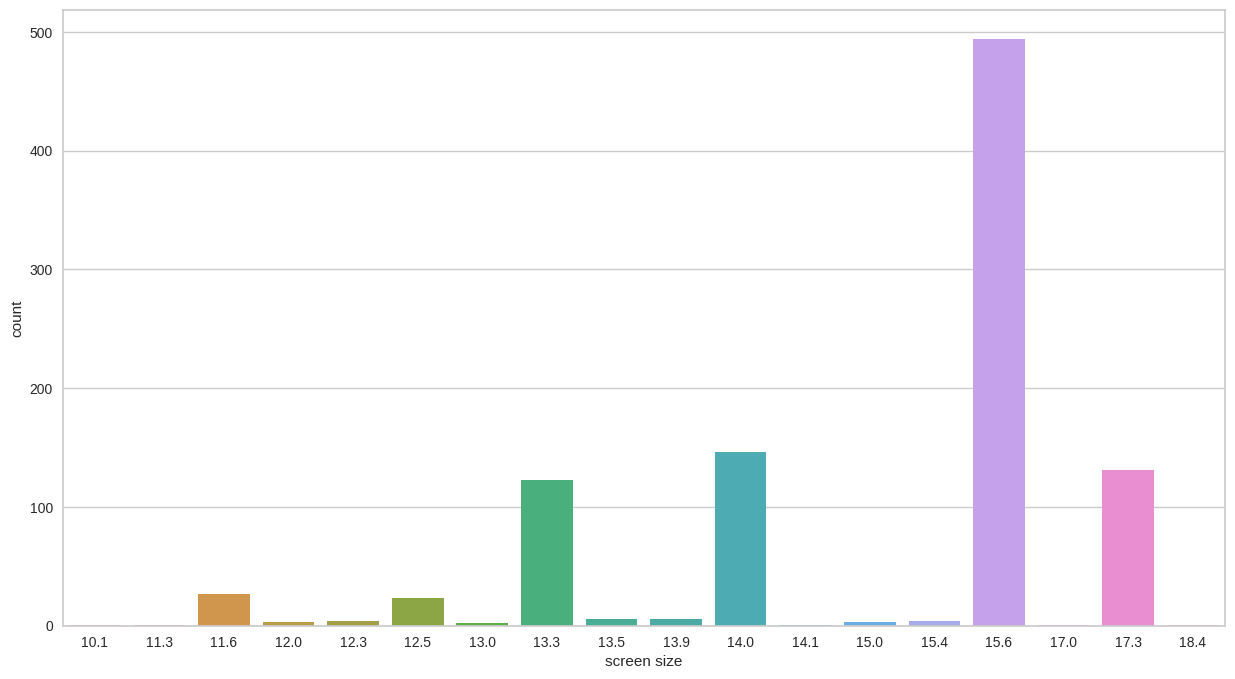

In [110]:
plt.subplots(figsize=(15, 8))
sns.countplot(x='screen size', data=train)
plt.show()

### Screen

In [111]:
train["screen"].head()

0    IPS Panel Retina Display 2560x1600
1                              1440x900
2                     Full HD 1920x1080
3    IPS Panel Retina Display 2880x1800
4    IPS Panel Retina Display 2560x1600
Name: screen, dtype: object

#### There are lots of features within screen variables, such as: resolution, screentype and touchscreen.

In [112]:
def extract_screen_features(train):
    train["resolution"] = train["screen"].str.extract(r'(\d+x\d+)')
    train["screentype"]= train["screen"].replace(r'(\d+x\d+)','', regex = True)
    train['screentype'] = train['screentype'].replace(r'(Full HD|Quad HD|Quad HD|\+|/|4K Ultra HD)','', regex = True)
    train['touchscreen'] = train['screentype'].str.extract(r'(Touchscreen)')
    train['screentype'] = train['screentype'].replace(r'(Touchscreen)','', regex = True)
    train['touchscreen'] = train['touchscreen'].replace('Touchscreen', 1)
    train['touchscreen'] = train['touchscreen'].replace(np.nan, 0)
    train['screentype'] = train['screentype'].replace(r' ','', regex = True)
    train['screentype'] = train['screentype'].replace(r'^\s*$', np.nan, regex = True)
    train = train.drop("screen",axis = 1)
    return train

In [113]:
train = extract_screen_features(train)
test = extract_screen_features(test)

In [114]:
train.head()

,manufacturer,model name,category,screen size,cpu,ram,gpu,operating system,operating system version,weight,price,cpu_manftr,gpu_manftr,primarystorage_size,primarystorage_type,secondarystorage_size,resolution,screentype,touchscreen
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8.0,Intel Iris Plus Graphics 640,macOS,10,1.37,11912523.48,Intel,Intel,128.0,SSD,0.0,2560x1600,IPSPanelRetinaDisplay,0.0
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8.0,Intel HD Graphics 6000,macOS,10,1.34,7993374.48,Intel,Intel,128.0,FlashStorage,0.0,1440x900,NaN,0.0
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8.0,Intel HD Graphics 620,No OS,10,1.86,5112900.00,Intel,Intel,256.0,SSD,0.0,1920x1080,NaN,0.0
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16.0,AMD Radeon Pro 455,macOS,10,1.83,22563005.40,Intel,AMD,512.0,SSD,0.0,2880x1800,IPSPanelRetinaDisplay,0.0
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8.0,Intel Iris Plus Graphics 650,macOS,10,1.37,16037611.20,Intel,Intel,256.0,SSD,0.0,2560x1600,IPSPanelRetinaDisplay,0.0


In [115]:
test.head()

,manufacturer,model name,category,screen size,cpu,ram,gpu,operating system,operating system version,weight,price,cpu_manftr,gpu_manftr,primarystorage_size,primarystorage_type,secondarystorage_size,secondarystorage_type,resolution,screentype,touchscreen
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,15.6,Intel Core i7 7500U 2.7GHz,6.0,Intel HD Graphics 620,Windows,10,2.04,5148468.0,Intel,Intel,1000.0,HDD,0.0,NaN,1366x768,NaN,0.0
1,Asus,Rog GL753VE-DS74,Gaming,17.3,Intel Core i7 7700HQ 2.8GHz,16.0,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99,15552108.0,Intel,Nvidia,256.0,SSD,1000.0,HDD,1920x1080,NaN,0.0
2,Dell,Inspiron 7579,2 in 1 Convertible,15.6,Intel Core i7 7500U 2.7GHz,12.0,Intel HD Graphics 620,Windows,10,2.19,11550708.0,Intel,Intel,512.0,SSD,0.0,NaN,1920x1080,IPSPanel,1.0
3,Toshiba,Portege Z30-C-1CV,Notebook,13.3,Intel Core i5 6200U 2.3GHz,4.0,Intel HD Graphics 520,Windows,7,1.20,10625940.0,Intel,Intel,128.0,SSD,0.0,NaN,1920x1080,NaN,0.0
4,Lenovo,IdeaPad 320-15ABR,Notebook,15.6,AMD A12-Series 9720P 3.6GHz,6.0,AMD Radeon 530,Windows,10,2.20,4881708.0,AMD,AMD,256.0,SSD,0.0,NaN,1920x1080,NaN,0.0


In [116]:
train.isnull().sum()

manufacturer                  0
model name                    0
category                      0
screen size                   0
cpu                           0
ram                           0
gpu                           0
operating system              0
operating system version      0
weight                        0
price                         0
cpu_manftr                    0
gpu_manftr                    0
primarystorage_size           0
primarystorage_type           0
secondarystorage_size         0
resolution                    0
screentype                  697
touchscreen                   0
dtype: int64

In [117]:
# Let's drop screentype column due to the high number of missing values.
train = train.drop(["screentype"], axis = 1)

In [118]:
train.head()

,manufacturer,model name,category,screen size,cpu,ram,gpu,operating system,operating system version,weight,price,cpu_manftr,gpu_manftr,primarystorage_size,primarystorage_type,secondarystorage_size,resolution,touchscreen
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8.0,Intel Iris Plus Graphics 640,macOS,10,1.37,11912523.48,Intel,Intel,128.0,SSD,0.0,2560x1600,0.0
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8.0,Intel HD Graphics 6000,macOS,10,1.34,7993374.48,Intel,Intel,128.0,FlashStorage,0.0,1440x900,0.0
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8.0,Intel HD Graphics 620,No OS,10,1.86,5112900.00,Intel,Intel,256.0,SSD,0.0,1920x1080,0.0
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16.0,AMD Radeon Pro 455,macOS,10,1.83,22563005.40,Intel,AMD,512.0,SSD,0.0,2880x1800,0.0
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8.0,Intel Iris Plus Graphics 650,macOS,10,1.37,16037611.20,Intel,Intel,256.0,SSD,0.0,2560x1600,0.0


In [119]:
train["resolution"].value_counts()

1920x1080    655
1366x768     206
3840x2160     36
1600x900      19
3200x1800     15
2560x1440     15
2560x1600      6
2256x1504      6
1440x900       4
2880x1800      4
2304x1440      3
2400x1600      3
1920x1200      2
2160x1440      2
2736x1824      1
Name: resolution, dtype: int64

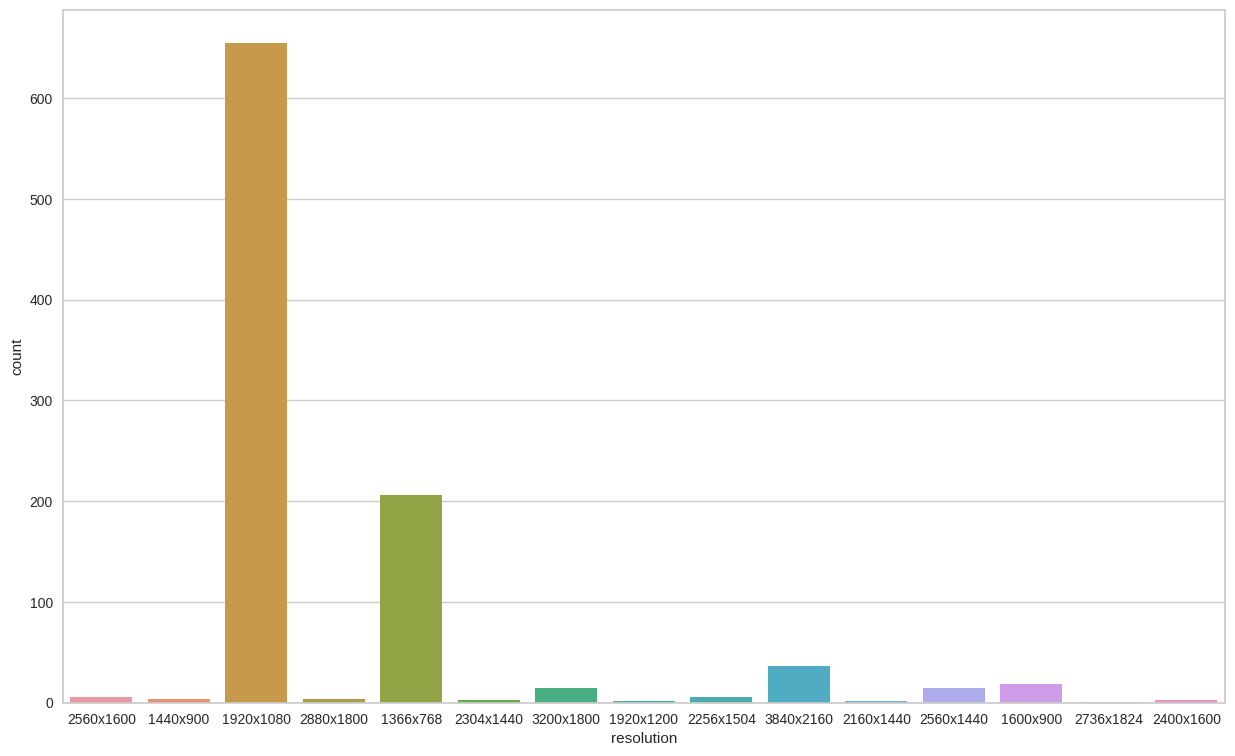

In [120]:
plt.subplots(figsize=(15, 9))
sns.countplot(x='resolution', data=train)
plt.show()

In [121]:
train["touchscreen"] = train["touchscreen"].astype(int)
train["touchscreen"].unique()

array([0, 1])

0    836
1    141
Name: touchscreen, dtype: int64


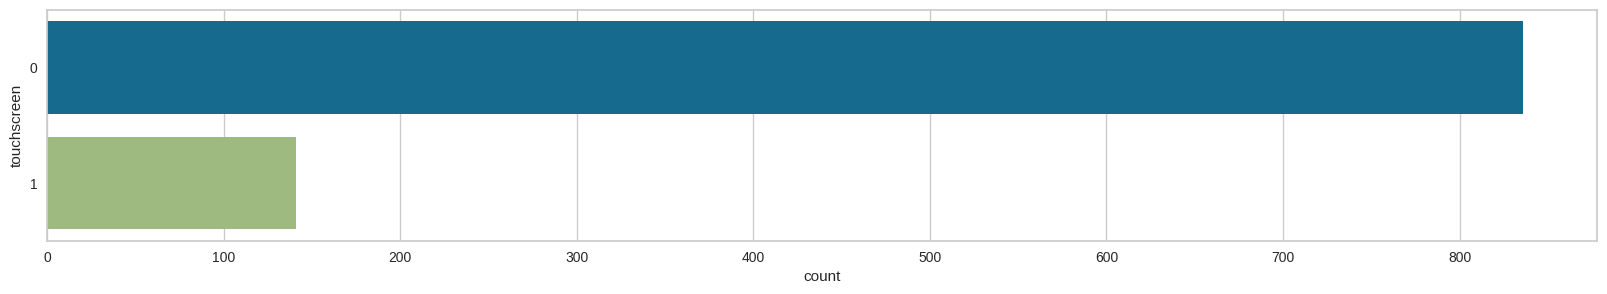

In [122]:
fig = plt.figure(figsize=(20,3))
sns.countplot(y='touchscreen', data=train);
print(train.touchscreen.value_counts())

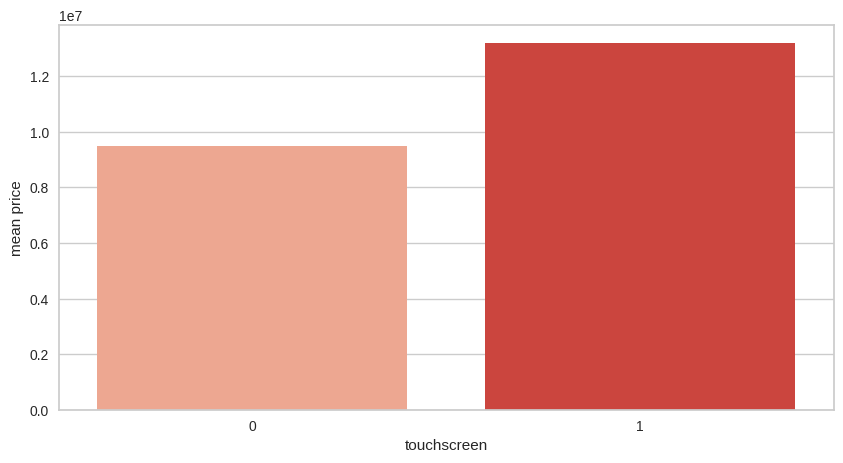

In [123]:
compare_means(train,'touchscreen','price')

### Machine Learning Initialization

In [124]:
train.head()

,manufacturer,model name,category,screen size,cpu,ram,gpu,operating system,operating system version,weight,price,cpu_manftr,gpu_manftr,primarystorage_size,primarystorage_type,secondarystorage_size,resolution,touchscreen
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8.0,Intel Iris Plus Graphics 640,macOS,10,1.37,11912523.48,Intel,Intel,128.0,SSD,0.0,2560x1600,0
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8.0,Intel HD Graphics 6000,macOS,10,1.34,7993374.48,Intel,Intel,128.0,FlashStorage,0.0,1440x900,0
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8.0,Intel HD Graphics 620,No OS,10,1.86,5112900.00,Intel,Intel,256.0,SSD,0.0,1920x1080,0
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16.0,AMD Radeon Pro 455,macOS,10,1.83,22563005.40,Intel,AMD,512.0,SSD,0.0,2880x1800,0
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8.0,Intel Iris Plus Graphics 650,macOS,10,1.37,16037611.20,Intel,Intel,256.0,SSD,0.0,2560x1600,0
